###  Èò∂ÊÆµ‰∏ÄÔºöÁ°ÆËÆ§Êú∫Ê¢∞ËáÇÂíåÊëÑÂÉèÂ§¥ÊòØÂê¶Ê≠£Á°ÆËøûÊé•

In [ ]:
# ‚úÖ ËÆæÁΩÆÈ°πÁõÆË∑ØÂæÑÔºåÁ°Æ‰øùÂêéÁª≠Ê®°ÂùóÂØºÂÖ•Ê≠£Â∏∏
import os, sys
import cv2

project_root = "/home/wjw/lerobot"
sys.path.insert(0, project_root)
os.chdir(project_root)

print("‚úÖ ÂΩìÂâçÈ°πÁõÆË∑ØÂæÑ:", os.getcwd())



In [ ]:
# ‚úÖ Ê£ÄÊü•Êú∫Ê¢∞ËáÇ‰∏≤Âè£ËÆæÂ§á
print("üîå ÂΩìÂâçÁ≥ªÁªü‰∏≤Âè£ËÆæÂ§áÔºö")
!ls /dev/ttyACM*

print("\nüìç Êü•Áúã‰∏≤Âè£ËÆæÂ§áÂ∫èÂàóÂè∑ÔºàÊé®ËçêÁî®‰∫éÁªëÂÆöÔºâÔºö")
!ls -l /dev/serial/by-id/

input("üëâ ËØ∑Á°ÆËÆ§Ëøô‰∫õÁ´ØÂè£ÊòØÂê¶‰∏é koch_robot_config.py ‰∏≠ÁöÑÈÖçÁΩÆ‰∏ÄËá¥ÂêéÔºåÂÜçÊåâ Enter ÁªßÁª≠")

In [ ]:
# ‚úÖ Ê£ÄÊµã Type-C Êé•Âè£ÊòØÂê¶ÊàêÂäüËØÜÂà´‰∏∫‰∏≤Âè£ËÆæÂ§á
import time

def list_serial_ports():
    return set(p for p in os.listdir('/dev') if p.startswith('ttyACM') or p.startswith('ttyUSB'))

print("üîå ËØ∑ÂÖà **ÊãîÊéâ Type-C Êú∫Ê¢∞ËáÇ**ÔºåÁÑ∂ÂêéÊåâ Enter...")
input()
before = list_serial_ports()

print("üîå Áé∞Âú®Êèí‰∏äËÆæÂ§áÔºåÁ≠âÂæÖ 5 Áßí...")
time.sleep(5)
after = list_serial_ports()

new_ports = after - before
if new_ports:
    print(f"üéØ Êñ∞ËØÜÂà´‰∏≤Âè£ËÆæÂ§á: {', '.join('/dev/' + p for p in new_ports)}")
else:
    print("‚ö†Ô∏è Êú™Ê£ÄÊµãÂà∞Êñ∞‰∏≤Âè£ËÆæÂ§áÔºåËØ∑Ê£ÄÊü•Êé•Âè£ÊàñÁ∫øÁºÜ")


In [ ]:
# ‚úÖ Ê£ÄÊü•ÊëÑÂÉèÂ§¥ËÆæÂ§áÊòØÂê¶Ê≠£Á°ÆËøûÊé•
print("üé• ÂΩìÂâçÊëÑÂÉèÂ§¥ËÆæÂ§áÂàóË°®Ôºö")
!ls /dev/video*

print("\nüì∑ Êü•ÁúãÊëÑÂÉèÂ§¥ËÆæÂ§áËØ¶ÁªÜ‰ø°ÊÅØÔºàÁ°ÆËÆ§ E22S ‰∏é E12ÔºâÔºö")
!v4l2-ctl --list-devices

In [ ]:
# # ‚úÖ ÔºàÂèØÈÄâÔºâÂà†Èô§ÊóßÊ†áÂÆöÁºìÂ≠òÊñá‰ª∂ÔºåÊÖéÁî®
# import shutil

# calib_path = "/home/wjw/lerobot/.cache/calibration/koch/"
# if os.path.exists(calib_path):
#     shutil.rmtree(calib_path)
#     print("‚ö†Ô∏è ÊóßÊ†áÂÆöÁºìÂ≠òÂ∑≤Âà†Èô§")
# else:
#     print("‚úÖ Êó†ÊóßÁºìÂ≠òÔºåÊó†ÈúÄÊ∏ÖÈô§")

# print("‚úÖ Step 3ÔºöÂ∑≤ÊâßË°åÁºìÂ≠òÊ£ÄÊü•‰∏éÊ∏ÖÈô§")  

In [ ]:
# # ‚úÖ ÂÆû‰æãÂåñ Koch ÈÖçÁΩÆÔºåÂπ∂Ê£ÄÊü•ÊëÑÂÉèÂ§¥ËÆæÁΩÆÊòØÂê¶Âä†ËΩΩÊàêÂäü
#‰∏ÄÂÆöË¶ÅÂÖàÊü•ÁúãÂ∞±

from lerobot.common.robot_devices.robots.configs import KochRobotConfig
from lerobot.common.robot_devices.robots.manipulator import ManipulatorRobot
from lerobot.common.robot_devices.cameras.configs import OpenCVCameraConfig

robot_cfg = KochRobotConfig()

# ‚úÖ ‰ΩøÁî®ÂΩìÂâç camera_indexÔºà‰∏çÂÜç‰ΩøÁî® device Ë∑ØÂæÑÔºâ
robot_cfg.cameras = {
    "e22s_side": OpenCVCameraConfig(
        camera_index=4,  # /dev/video3 = E22S ‰æßËßÜ
        fps=30,
        width=640,
        height=480,
    ),
    "e12_top": OpenCVCameraConfig(
        camera_index=2,  # /dev/video4 = E12 ‰øØËßÜ
        fps=30,
        width=640,
        height=480,
    ),
}

robot = ManipulatorRobot(robot_cfg)
print("ü§ñ Ê≠£Âú®ËøûÊé•Êú∫Âô®‰∫∫...ÔºàÈ¶ñÊ¨°ËøêË°åÂ∞ÜËá™Âä®ËøõÂÖ•Ê†áÂÆöÔºâ")
robot.connect()

print("‚úÖ Ê†áÂÆöÂÆåÊàêÔºåÂ∑≤Âä†ËΩΩÊëÑÂÉèÂ§¥ÈÖçÁΩÆ:")
for name, cam in robot_cfg.cameras.items():
    print(f" - {name}: /dev/video{cam.camera_index}")



In [ ]:
# ‚úÖ Êü•ÁúãÂΩìÂâçÊòØÂê¶Â≠òÂú®Êú∫Ê¢∞ËáÇÊ†áÂÆöÊñá‰ª∂
!ls -l /home/wjw/lerobot/.cache/calibration/koch/

In [ ]:
# ËØªÂèñ‰∏ªËáÇÁöÑÁä∂ÊÄÅ
leader_status = robot.leader_arms["main"].read("Hardware_Error_Status")
leader_torque = robot.leader_arms["main"].read("Torque_Enable")
leader_position = robot.leader_arms["main"].read("Present_Position")

# ËØªÂèñ‰ªéËáÇÁöÑÁä∂ÊÄÅ
follower_status = robot.follower_arms["main"].read("Hardware_Error_Status")
follower_torque = robot.follower_arms["main"].read("Torque_Enable")
follower_position = robot.follower_arms["main"].read("Present_Position")

# ÊâìÂç∞ÁªìÊûú
print("‚úÖ ‰∏ªËáÇÁ°¨‰ª∂ÈîôËØØÁä∂ÊÄÅ:", leader_status)
print("‚úÖ ‰∏ªËáÇÊâ≠Áü©Áä∂ÊÄÅ:", leader_torque)
print("‚úÖ ‰∏ªËáÇÂΩìÂâçÂÖ≥ËäÇ‰ΩçÁΩÆ:", leader_position)
print("‚úÖ ‰ªéËáÇÁ°¨‰ª∂ÈîôËØØÁä∂ÊÄÅ:", follower_status)
print("‚úÖ ‰ªéËáÇÊâ≠Áü©Áä∂ÊÄÅ:", follower_torque)
print("‚úÖ ‰ªéËáÇÂΩìÂâçÂÖ≥ËäÇ‰ΩçÁΩÆ:", follower_position)

from lerobot.common.robot_devices.motors.dynamixel import TorqueMode

In [10]:
# # Cell 6: ÊµãËØï‰∏ª‰ªéÂêåÊ≠•ÈÅ•Êéß
# import time
# import tqdm

# print("ÂºÄÂßã‰∏ª‰ªéÂêåÊ≠•ÊµãËØïÔºåÊó∂Èïø 15 ÁßíÔºåÈ¢ëÁéá 30Hz...")
# seconds = 15
# frequency = 30
# interval = 1 / frequency

# for _ in tqdm.tqdm(range(seconds * frequency)):
#     leader_pos = robot.leader_arms["main"].read("Present_Position")
#     robot.follower_arms["main"].write("Goal_Position", leader_pos)
#     time.sleep(interval)

# print("‚úÖ ‰∏ª‰ªéËáÇÂêåÊ≠•ÊµãËØïÂÆåÊàêÔºÅ")


# Cell 6: ÊµãËØï‰∏ª‰ªéÂêåÊ≠•ÈÅ•ÊéßÔºå‰ªÖ‰ªÖÂè™ÊòØÂêåÊ≠•ÁöÑÊµãËØïÔºåÊú™Ê∂âÂèäÊú∫Ê¢∞ËáÇÂíåÊëÑÂÉèÂ§¥ÁöÑÂêåÊ≠•Â∑•‰Ωú
import time
import tqdm

print("ÂºÄÂßã‰∏ª‰ªéÂêåÊ≠•ÊµãËØïÔºåÊó∂Èïø 30 ÁßíÔºåÈ¢ëÁéá 200Hz...")
seconds = 30
frequency = 200
interval = 1 / frequency

for _ in tqdm.tqdm(range(seconds * frequency)):
    leader_pos = robot.leader_arms["main"].read("Present_Position")
    robot.follower_arms["main"].write("Goal_Position", leader_pos)
    time.sleep(interval)

print("‚úÖ ‰∏ª‰ªéËáÇÂêåÊ≠•ÊµãËØïÂÆåÊàêÔºÅ")

ÂºÄÂßã‰∏ª‰ªéÂêåÊ≠•ÊµãËØïÔºåÊó∂Èïø 30 ÁßíÔºåÈ¢ëÁéá 200Hz...


 21%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè                              | 1264/6000 [00:13<00:48, 96.73it/s]


KeyboardInterrupt: 

In [ ]:
import os
import subprocess

def check_camera_usage(video_devices=["/dev/video0", "/dev/video2"]):
    print("üîç Ê≠£Âú®Ê£ÄÊü•ÊëÑÂÉèÂ§¥Âç†Áî®ÊÉÖÂÜµ...\n")
    for dev in video_devices:
        try:
            result = subprocess.run(["lsof", dev], capture_output=True, text=True)
            if result.stdout:
                print(f"‚ö†Ô∏è {dev} Ê≠£Ë¢´‰ª•‰∏ãËøõÁ®ãÂç†Áî®Ôºö\n{result.stdout}")
            else:
                print(f"‚úÖ {dev} ÂΩìÂâçÊú™Ë¢´Âç†Áî®ÔºåÂèØÂÆâÂÖ®ËÆøÈóÆ„ÄÇ")
        except Exception as e:
            print(f"‚ùå Êó†Ê≥ïÊ£ÄÊü• {dev}Ôºö{e}")

check_camera_usage()

print("üí° Â¶ÇÈÅáÊëÑÂÉèÂ§¥Êó†Ê≥ïÊâìÂºÄÔºåËØ∑ÊâßË°åÔºö")
print("1Ô∏è‚É£ ÁªàÁ´Ø‰∏≠ËøêË°å `lsof /dev/video0` Á≠âÂëΩ‰ª§Êü•ÁúãÂç†Áî®ËøõÁ®ã")
print("2Ô∏è‚É£ ‰ΩøÁî® `kill -9 <PID>` ÈáäÊîæÂç†Áî®,Âç≥ sudo kill -9 <PID>")
print("3Ô∏è‚É£ ÈáçÂêØ Jupyter Kernel Âπ∂ÈáçÊñ∞ËøûÊé•ÊëÑÂÉèÂ§¥")



In [7]:
# (lerobot) wjw@wjw-ASUS-TUF-Gaming-F15-FX507VV-FX507VV:~$ lsof /dev/video0
# lsof /dev/video2
# COMMAND  PID USER   FD   TYPE DEVICE SIZE/OFF NODE NAME
# python  7300  wjw  mem    CHR   81,0          1102 /dev/video0
# python  7300  wjw   71u   CHR   81,0      0t0 1102 /dev/video0
# COMMAND  PID USER   FD   TYPE DEVICE SIZE/OFF NODE NAME
# python  7300  wjw  mem    CHR   81,2          1105 /dev/video2
# python  7300  wjw   72u   CHR   81,2      0t0 1105 /dev/video2
# (lerobot) wjw@wjw-ASUS-TUF-Gaming-F15-FX507VV-FX507VV:~$ kill -9 7300
# (lerobot) wjw@wjw-ASUS-TUF-Gaming-F15-FX507VV-FX507VV:~$ lsof /dev/video0
# lsof /dev/video2
# ËøòË¶ÅÂÖàÊ£ÄÊü•ÊëÑÂÉèÂ§¥ÊòØÂê¶ÂèàÊ≤°ÊúâÈáäÊîæ


# ‚úÖ ÊëÑÂÉèÂ§¥È¢ÑËßàÊµãËØïÔºàÊúÄÈïø 10 ÁßíÔºåÈò≤Ê≠¢ Notebook Âç°Ê≠ªÔºâ
import cv2
import time

# ‚úÖ Ê≠£Á°ÆÊò†Â∞ÑËÆæÂ§áÁºñÂè∑
cap0 = cv2.VideoCapture(0)  # E22S ‚Üí /dev/video2Ôºà‰æßËßÜÔºâ
cap1 = cv2.VideoCapture(4)  # E12  ‚Üí /dev/video0Ôºà‰øØËßÜÔºâ

font = cv2.FONT_HERSHEY_SIMPLEX
print("üé• Ê≠£Âú®ÂêØÂä®ÊëÑÂÉèÂ§¥È¢ÑËßàÊµãËØïÔºàÊúÄÈïø 10 ÁßíÔºâÔºåÊåâ Q ÈîÆ‰πüÂèØÊèêÂâçÈÄÄÂá∫")

start_time = time.time()

while True:
    ret0, frame0 = cap0.read()
    ret1, frame1 = cap1.read()

    if ret0:
        cv2.putText(frame0, "E22S /dev/video0", (10, 30), font, 1, (0, 255, 0), 2)
        cv2.imshow("Camera - E22S (video0)", frame0)
    else:
        print("‚ùå Êó†Ê≥ïËØªÂèñ E22S /dev/video4 Â∏ß")

    if ret1:
        cv2.putText(frame1, "E12 /dev/video4", (10, 30), font, 1, (0, 255, 0), 2)
        cv2.imshow("Camera - E12 (video4)", frame1)
    else:
        print("‚ùå Êó†Ê≥ïËØªÂèñ E12 /dev/video2 Â∏ß")

    # ‚è± Ëá™Âä®ÈÄÄÂá∫Êú∫Âà∂Ôºà10ÁßíÔºâ
    if time.time() - start_time > 10:
        print("üïí Â∑≤ËææÂà∞ 10 ÁßíÈ¢ÑËßàÊó∂Èó¥ÔºåËá™Âä®ÈÄÄÂá∫„ÄÇ")
        break

    # ‚úÖ ÊîØÊåÅÊåâÈîÆÈÄÄÂá∫ÔºàQÔºâ
    if cv2.waitKey(1) & 0xFF == ord('q'):
        print("üõë Êåâ Q ÈîÆÈÄÄÂá∫È¢ÑËßà")
        break

cap0.release()
cap1.release()
cv2.destroyAllWindows()




üé• Ê≠£Âú®ÂêØÂä®ÊëÑÂÉèÂ§¥È¢ÑËßàÊµãËØïÔºàÊúÄÈïø 10 ÁßíÔºâÔºåÊåâ Q ÈîÆ‰πüÂèØÊèêÂâçÈÄÄÂá∫
üõë Êåâ Q ÈîÆÈÄÄÂá∫È¢ÑËßà


### Èò∂ÊÆµ‰∫åÔºöÊï∞ÊçÆÈááÈõÜ Ëøô‰∏™‰ª£Á†Å‰∏çË°åÔºåÂ§öÁ∫øÁ®ã‰ºöÈÄ†ÊàêÂÜ≤Á™Å

In [8]:
# ## ÈááÈõÜÁöÑÊï∞ÊçÆÁªìÊûÑÔºö
# results/recordings/
# ‚îî‚îÄ‚îÄ clip_00001/
#     ‚îú‚îÄ‚îÄ images_cam0/
#     ‚îÇ   ‚îú‚îÄ‚îÄ frame_00000.jpg
#     ‚îÇ   ‚îú‚îÄ‚îÄ frame_00001.jpg
#     ‚îÇ   ‚îî‚îÄ‚îÄ ...
#     ‚îú‚îÄ‚îÄ images_cam1/
#     ‚îÇ   ‚îú‚îÄ‚îÄ frame_00000.jpg
#     ‚îÇ   ‚îú‚îÄ‚îÄ frame_00001.jpg
#     ‚îÇ   ‚îî‚îÄ‚îÄ ...
#     ‚îú‚îÄ‚îÄ joint_states/
#     ‚îÇ   ‚îî‚îÄ‚îÄ joint_data.npy   # [(timestamp, leader_joint_pos, follower_joint_pos), ...]
#     ‚îú‚îÄ‚îÄ settings.yaml        # ËÆ∞ÂΩï FPS„ÄÅÈááÈõÜÊó∂Èó¥„ÄÅÊëÑÂÉèÂ§¥ÁºñÂè∑Á≠â
#     ‚îî‚îÄ‚îÄ timestamp_log.txt    # ÂèØÈÄâÔºöÂ¶ÇÊûú‰Ω†ÊÉ≥ÊääÊØèÂ∏ßÊó∂Èó¥Êà≥Áã¨Á´ãÂ≠ò


In [ ]:
# üé¨ Èò∂ÊÆµ‰∫åÔºöÊï∞ÊçÆÈááÈõÜ Notebook

Êú¨ Notebook Áî®‰∫éÂú®**‰∏ª‰ªéÊéßÂà∂**‰∏ãÂêåÊ≠•ÂΩïÂà∂ÂõæÂÉè‰∏éÂÖ≥ËäÇÊï∞ÊçÆÔºö
- ËøûÊé•‰∏ª„ÄÅ‰ªéÊú∫Ê¢∞ËáÇ
- ÊâìÂºÄÂèåÊëÑÂÉèÂ§¥ÔºàE22S / E12Ôºâ
- ‰øùÂ≠òÂõæÂÉèÂ∏ß + (leader_angles, follower_angles) + Êó∂Èó¥Êà≥
- Â§öÊ¨°ÂΩïÂà∂ÔºåÁîüÊàêÂ§ö‰∏™ clip Êñá‰ª∂Â§π

ÊåâÈúÄÊ±Ç‰øÆÊîπÊú¨Á§∫‰æã‰∏≠ÁöÑÂèÇÊï∞ÔºàFPS„ÄÅÈááÈõÜÊó∂Èïø„ÄÅÊñá‰ª∂Â§πÁªìÊûÑÔºâÂç≥ÂèØ„ÄÇ


In [ ]:
# ‚úÖ ÂàùÂßãÂåñÔºöÂØºÂÖ•ÂøÖË¶ÅÂ∫ì
import os
import time
import numpy as np
import cv2
from datetime import datetime
from pathlib import Path
import sys

project_root = "/home/wjw/lerobot"
sys.path.insert(0, project_root)
os.chdir(project_root)

print("‚úÖ ÂΩìÂâçÈ°πÁõÆË∑ØÂæÑ:", os.getcwd())

from lerobot.common.robot_devices.robots.configs import KochRobotConfig
from lerobot.common.robot_devices.robots.manipulator import ManipulatorRobot
from lerobot.common.robot_devices.cameras.configs import OpenCVCameraConfig

robot_cfg = KochRobotConfig()

# ‚úÖ ‰ΩøÁî®ÂΩìÂâç camera_indexÔºà‰∏çÂÜç‰ΩøÁî® device Ë∑ØÂæÑÔºâ
robot_cfg.cameras = {
    "e22s_side": OpenCVCameraConfig(
        camera_index=4,  # /dev/video3 = E22S ‰æßËßÜ
        fps=30,
        width=640,
        height=480,
    ),
    "e12_top": OpenCVCameraConfig(
        camera_index=2,  # /dev/video4 = E12 ‰øØËßÜ
        fps=30,
        width=640,
        height=480,
    ),
}

robot = ManipulatorRobot(robot_cfg)
print("ü§ñ Ê≠£Âú®ËøûÊé•Êú∫Âô®‰∫∫...ÔºàÈ¶ñÊ¨°ËøêË°åÂ∞ÜËá™Âä®ËøõÂÖ•Ê†áÂÆöÔºâ")
robot.connect()

print("‚úÖ Ê†áÂÆöÂÆåÊàêÔºåÂ∑≤Âä†ËΩΩÊëÑÂÉèÂ§¥ÈÖçÁΩÆ:")
for name, cam in robot_cfg.cameras.items():
    print(f" - {name}: /dev/video{cam.camera_index}")


In [ ]:
import os
import subprocess

def check_camera_usage(video_devices=["/dev/video0", "/dev/video2"]):
    print("üîç Ê≠£Âú®Ê£ÄÊü•ÊëÑÂÉèÂ§¥Âç†Áî®ÊÉÖÂÜµ...\n")
    for dev in video_devices:
        try:
            result = subprocess.run(["lsof", dev], capture_output=True, text=True)
            if result.stdout:
                print(f"‚ö†Ô∏è {dev} Ê≠£Ë¢´‰ª•‰∏ãËøõÁ®ãÂç†Áî®Ôºö\n{result.stdout}")
            else:
                print(f"‚úÖ {dev} ÂΩìÂâçÊú™Ë¢´Âç†Áî®ÔºåÂèØÂÆâÂÖ®ËÆøÈóÆ„ÄÇ")
        except Exception as e:
            print(f"‚ùå Êó†Ê≥ïÊ£ÄÊü• {dev}Ôºö{e}")

check_camera_usage()

print("üí° Â¶ÇÈÅáÊëÑÂÉèÂ§¥Êó†Ê≥ïÊâìÂºÄÔºåËØ∑ÊâßË°åÔºö")
print("1Ô∏è‚É£ ÁªàÁ´Ø‰∏≠ËøêË°å `lsof /dev/video0` Á≠âÂëΩ‰ª§Êü•ÁúãÂç†Áî®ËøõÁ®ã")
print("2Ô∏è‚É£ ‰ΩøÁî® `kill -9 <PID>` ÈáäÊîæÂç†Áî®,Âç≥ sudo kill -9 <PID>")
print("3Ô∏è‚É£ ÈáçÂêØ Jupyter Kernel Âπ∂ÈáçÊñ∞ËøûÊé•ÊëÑÂÉèÂ§¥")


In [ ]:
# ‚úÖ ËÆæÁΩÆÊï∞ÊçÆ‰øùÂ≠òÂü∫ÂáÜÁõÆÂΩï
base_dir = "results/recordings"
os.makedirs(base_dir, exist_ok=True)

# Ëá™Âä® clip ÁºñÂè∑ÂáΩÊï∞
def get_next_clip_id(base_dir):
    existing = sorted([d for d in os.listdir(base_dir) if d.startswith("clip_")])
    if not existing:
        return 1
    last = int(existing[-1].split("_")[-1])
    return last + 1

clip_id = get_next_clip_id(base_dir)
print(f"üìÇ Êú¨Ê¨°ÈááÈõÜÂ∞Ü‰øùÂ≠òÂà∞ clip_{clip_id:05d}")


In [ ]:
# ÂàõÂª∫Ë∑ØÂæÑ
clip_path = Path(base_dir) / f"clip_{clip_id:05d}"
cam0_dir = clip_path / "images_cam0"
cam1_dir = clip_path / "images_cam1"
joint_dir = clip_path / "joint_states"
for d in [cam0_dir, cam1_dir, joint_dir]:
    d.mkdir(parents=True, exist_ok=True)

# ÁªëÂÆöÁõ∏Êú∫ÁºñÂè∑ÔºàÊ†πÊçÆ‰∏ä‰∏ÄÊ≠• camera_index ËÆæÁΩÆÔºâ
cam0_idx = robot_cfg.cameras["e22s_side"].camera_index
cam1_idx = robot_cfg.cameras["e12_top"].camera_index


In [ ]:
# ‚úÖ ÂêåÊ≠•ÊéßÂà∂ÂçïÂÖÉÊ†ºÔºö‰∏ªËáÇÊéßÂà∂‰ªéËáÇÔºàÊåÅÁª≠ËøêË°åÔºâ-ÂçïÁ∫øÁ®ãÂè™ËÉΩÂêå‰∏ÄÊó∂Èó¥ËøêË°åÊ≠§‰ª£Á†ÅÔºåÊó†Ê≥ïÂêåÊó∂ÂΩïÂà∂ËßÜÈ¢ë
import time

print("üïπÔ∏è Ê≠£Âú®ÂêØÂä®‰∏ª‰ªéÂêåÊ≠•ÊéßÂà∂ÔºàËØ∑Âú®Âè¶‰∏Ä‰∏™ÂçïÂÖÉÊ†ºÊâßË°åÈááÈõÜÔºâ")

while True:
    try:
        leader_angles = robot.leader_arms["main"].read("Present_Position")
        robot.follower_arms["main"].write("Goal_Position", leader_angles)
        time.sleep(0.01)  # ÊéßÂà∂È¢ëÁéáÔºåÁ∫¶ 100Hz
    except KeyboardInterrupt:
        print("üõë ÊâãÂä®ÁªàÊ≠¢ÂêåÊ≠•ÊéßÂà∂") #Âú® Jupyter Notebook ‰∏≠Áõ¥Êé•ÊåâÔºöEsc ‚Üí i ‚Üí i ÔºàËøûÁª≠Êåâ‰∏§‰∏ãÂ≠óÊØç iÔºâ
        break


In [ ]:
import threading

# ÊéßÂà∂ÊòØÂê¶ÁªßÁª≠ÂêåÊ≠•
sync_running = True

def sync_loop():
    global sync_running
    print("üîÅ ÂºÄÂßã‰∏ª‰ªéÂêåÊ≠•Á∫øÁ®ã...")
    while sync_running:
        try:
            leader_pos = robot.leader_arms["main"].read("Present_Position")
            robot.follower_arms["main"].write("Goal_Position", leader_pos)
            time.sleep(1 / 30)  # 30Hz
        except Exception as e:
            print(f"‚ö†Ô∏è ÂêåÊ≠•Á∫øÁ®ãÂºÇÂ∏∏Ôºö{e}")
            break
    print("üõë ‰∏ª‰ªéÂêåÊ≠•Á∫øÁ®ãÂ∑≤ÈÄÄÂá∫")

# ÂêØÂä®Á∫øÁ®ãÔºàÂêéÂè∞ÊâßË°åÔºâ
sync_thread = threading.Thread(target=sync_loop, daemon=True)
sync_thread.start()


In [ ]:
# ‚úÖ ÈááÈõÜ‰∏ÄËΩÆ clipÔºà‰øùÂ≠òÂõæÂÉè + ‰∏ª‰ªéËßíÂ∫¶ + Êó∂Èó¥Êà≥Ôºâ
from datetime import datetime
import cv2
import os
from pathlib import Path

# üìÅ ËÆæÁΩÆË∑ØÂæÑ
base_dir = "results/recordings"
os.makedirs(base_dir, exist_ok=True)

def get_next_clip_id(base_dir):
    existing = sorted([d for d in os.listdir(base_dir) if d.startswith("clip_")])
    if not existing:
        return 1
    last = int(existing[-1].split("_")[-1])
    return last + 1

clip_id = get_next_clip_id(base_dir)
clip_path = Path(base_dir) / f"clip_{clip_id:05d}"
cam0_dir = clip_path / "images_cam0"
cam1_dir = clip_path / "images_cam1"
joint_dir = clip_path / "joint_states"
for d in [cam0_dir, cam1_dir, joint_dir]:
    d.mkdir(parents=True, exist_ok=True)

print(f"üì¶ ÂºÄÂßãÈááÈõÜ clip_{clip_id:05d}ÔºåÊåâ Q ÈîÆÈÄÄÂá∫...")

cap0 = cv2.VideoCapture(0)  # /dev/video0 = E22S
cap1 = cv2.VideoCapture(2)  # /dev/video2 = E12

frame_id = 0
joint_data_list = []

while True:
    timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")

    ret0, frame0 = cap0.read()
    ret1, frame1 = cap1.read()

    try:
        leader_angles = robot.leader_arms["main"].read("Present_Position")
        follower_angles = robot.follower_arms["main"].read("Present_Position")
    except Exception as e:
        print(f"‚ö†Ô∏è ËØªÂèñÂ§±Ë¥•ÔºåË∑≥ËøáÂ∏ß: {e}")
        continue

    if not (ret0 and ret1):
        print("‚ùå ÂõæÂÉèÈááÈõÜÂ§±Ë¥•ÔºåË∑≥ËøáÂΩìÂâçÂ∏ß")
        continue

    # üíæ ‰øùÂ≠òÂõæÂÉè
    cv2.imwrite(str(cam0_dir / f"frame_{frame_id:05d}.jpg"), frame0)
    cv2.imwrite(str(cam1_dir / f"frame_{frame_id:05d}.jpg"), frame1)

    # üíæ ‰øùÂ≠òÂÖ≥ËäÇ
    joint_data_list.append((timestamp, leader_angles, follower_angles))

    # üñºÔ∏è ÂèØËßÜÂåñÈ¢ÑËßà
    cv2.imshow("E22S View", frame0)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        print("üõë Êú¨ËΩÆÈááÈõÜÁªìÊùü")
        break

    frame_id += 1

# ‚úÖ Â≠òÂÇ®ÂÖ≥ËäÇÊï∞ÊçÆ
joint_save_path = joint_dir / "joint_data.txt"
with open(joint_save_path, "w") as f:
    for entry in joint_data_list:
        f.write(f"{entry[0]} {entry[1]} {entry[2]}\n")

cap0.release()
cap1.release()
cv2.destroyAllWindows()


In [ ]:
# üõë ÂÅúÊ≠¢‰∏ª‰ªéÂêåÊ≠•Á∫øÁ®ã
print("üõë Ê≠£Âú®ËØ∑Ê±ÇÂÅúÊ≠¢‰∏ª‰ªéÂêåÊ≠•Á∫øÁ®ã...")
sync_running = False
time.sleep(0.5)  # Á®çÁ≠âÁ∫øÁ®ãÊ≠£Â∏∏ÈÄÄÂá∫
print("‚úÖ ‰∏ª‰ªéÂêåÊ≠•Á∫øÁ®ãÂ∑≤ÂÆâÂÖ®ÂÅúÊ≠¢ÔºÅÁé∞Âú®ÂèØ‰ª•ËøêË°å‰∏ã‰∏ÄÂçïÂÖÉÊ†ºÈááÈõÜÊï∞ÊçÆ„ÄÇ")



## ÂÆåÊï¥ÁöÑÈò∂ÊÆµ‰∫åÊµÅÁ®ã-‰ªéËáÇÊúâ‰π±Ë∑≥Âä®ÁöÑÊÉÖÂÜµ

In [1]:
import os
import time
import threading
import numpy as np
import cv2

cap = cv2.VideoCapture(2)
if cap.isOpened():
    print("camera 0 OK")
cap.release()


camera 0 OK


In [2]:
cap = cv2.VideoCapture(2)
if cap.isOpened():
    print("camera 2 OK")
cap.release()

camera 2 OK


## Áé∞Âú®ËÉΩÂ§üÊ≠£Á°ÆËØªÂèñÁõ∏Êú∫ÂΩïÂà∂ÁöÑÂ∏ßÂõæÁâáÔºàËßÜÈ¢ëÔºâ‰∫ÜÔºå‰ΩÜÊòØËøêË°åÂÆå‰∏äÈù¢Ëøô‰∏™ÔºåÂÜçËøêË°å‰∏ãÈù¢Ëøô‰∏™Êó∂Ôºå‰ªéËáÇÂá∫Áé∞‰∏çÂèóÊéßÂà∂ÁöÑ‰π±Ë∑≥ÁöÑÈóÆÈ¢ò

### Á®≥ÂÆöÁâàÊú¨ - 3Êúà31Êó•ÊúÄÊñ∞ÁâàÊú¨

In [3]:
# # ‚úÖ Cell 0ÔºöÊ∏ÖÈô§ÊóßÊ†áÂÆöÁºìÂ≠òÔºåÂº∫Âà∂ÈáçÊñ∞Ëß¶ÂèëÊ†áÂÆöÔºàÊÖéÁî®Ôºâ
# import shutil
# import os

# # ËÆæÂÆöÊ†áÂÆöÊñá‰ª∂Ë∑ØÂæÑ
# calib_path = os.path.expanduser("~/.cache/calibration/koch/")

# if os.path.exists(calib_path):
#     try:
#         shutil.rmtree(calib_path)
#         print(f"üßπ ÊóßÊ†áÂÆöÁºìÂ≠òÂ∑≤Ê∏ÖÈô§: {calib_path}")
#     except Exception as e:
#         print(f"‚ùå Ê∏ÖÈô§Â§±Ë¥•: {e}")
# else:
#     print(f"‚ÑπÔ∏è Êú™Ê£ÄÊµãÂà∞ÊóßÊ†áÂÆöÊñá‰ª∂ÔºåÊó†ÈúÄÊ∏ÖÈô§")

# print("‚úÖ ÂèØ‰ª•ËøêË°å Cell 1 ÂºÄÂßãÊñ∞ÁöÑÊ†áÂÆöÊµÅÁ®ã")

# ‚úÖ ËÆæÁΩÆÈ°πÁõÆË∑ØÂæÑÔºåÁ°Æ‰øùÂêéÁª≠Ê®°ÂùóÂØºÂÖ•Ê≠£Â∏∏
import os, sys
import cv2

project_root = "/home/wjw/lerobot/results"
sys.path.insert(0, project_root)
os.chdir(project_root)

print("‚úÖ ÂΩìÂâçÈ°πÁõÆË∑ØÂæÑ:", os.getcwd())



‚úÖ ÂΩìÂâçÈ°πÁõÆË∑ØÂæÑ: /home/wjw/lerobot/results


In [9]:
# ‚úÖ Cell 1ÔºöÂàùÂßãÂåñÊú∫Âô®‰∫∫‰∏éÁõ∏Êú∫ÔºàÂ¢ûÂº∫ÁâàÔºâ
import os, time, threading
import numpy as np
import cv2
from datetime import datetime
from pathlib import Path

from lerobot.common.robot_devices.robots.configs import KochRobotConfig
from lerobot.common.robot_devices.robots.manipulator import ManipulatorRobot
from lerobot.common.robot_devices.cameras.configs import OpenCVCameraConfig

# ËÆæÁΩÆÊú∫Âô®‰∫∫ÈÖçÁΩÆ
robot_cfg = KochRobotConfig()Èòø
robot_cfg.cameras = {
    "e22s_side": OpenCVCameraConfig(camera_index=0, fps=30, width=640, height=480),  # E22S ‰æßËßÜ
    "e12_top": OpenCVCameraConfig(camera_index=4, fps=30, width=640, height=480),    # E12 ‰øØËßÜ
}

# ÂàùÂßãÂåñÊú∫Âô®‰∫∫ÂØπË±°
robot = ManipulatorRobot(robot_cfg)

# Â∞ùËØïËøûÊé•
print("ü§ñ Ê≠£Âú®ËøûÊé•Êú∫Âô®‰∫∫ÔºàÂ¶ÇÈ¶ñÊ¨°Â∞ÜËá™Âä®ËøõÂÖ•Ê†áÂÆöÊµÅÁ®ãÔºâ...")
try:
    robot.connect()
    print("‚úÖ Êú∫Âô®‰∫∫ËøûÊé•ÂÆåÊàê")

    # ÊòæÁ§∫Ê†áÂÆö‰øùÂ≠òË∑ØÂæÑÔºàÈ™åËØÅÊ†áÂÆöÊµÅÁ®ãÊòØÂê¶ÊâßË°åÔºâ
    print("üìÅ Ê†áÂÆöÊñá‰ª∂‰øùÂ≠òË∑ØÂæÑÔºö", robot_cfg.calibration_dir)
except Exception as e:
    print(f"‚ùå Êú∫Âô®‰∫∫ËøûÊé•Â§±Ë¥•: {e}")

# ÊâìÂç∞Áõ∏Êú∫‰ø°ÊÅØÁ°ÆËÆ§ËÆæÂ§áÂè∑
print("‚úÖ ÊëÑÂÉèÂ§¥Âä†ËΩΩÂÆåÊàê:")
for name, cam in robot_cfg.cameras.items():
    print(f" - {name}: /dev/video{cam.camera_index}")


ü§ñ Ê≠£Âú®ËøûÊé•Êú∫Âô®‰∫∫ÔºàÂ¶ÇÈ¶ñÊ¨°Â∞ÜËá™Âä®ËøõÂÖ•Ê†áÂÆöÊµÅÁ®ãÔºâ...
Connecting main follower arm.
Connecting main leader arm.
Activating torque on main follower arm.
‚úÖ Êú∫Âô®‰∫∫ËøûÊé•ÂÆåÊàê
üìÅ Ê†áÂÆöÊñá‰ª∂‰øùÂ≠òË∑ØÂæÑÔºö .cache/calibration/koch
‚úÖ ÊëÑÂÉèÂ§¥Âä†ËΩΩÂÆåÊàê:
 - e22s_side: /dev/video0
 - e12_top: /dev/video4


In [5]:
# def get_next_clip_id(base_dir="recordings"):
#     os.makedirs(base_dir, exist_ok=True)
#     clips = sorted([d for d in os.listdir(base_dir) if d.startswith("clip_")])
#     return 1 if not clips else int(clips[-1].split("_")[-1]) + 1



In [46]:
# ‚úÖ È´òÁ≤æÂ∫¶ÊéßÂà∂ÈááÈõÜÂë®Êúü + ÂéüÂßãÁªìÊûÑÔºà‰∏ç‰ΩøÁî® image queueÔºâ-ÊúÄÁªàÁöÑÂΩïÂà∂Êï∞ÊçÆ‰ª£Á†Å
import os, time, cv2, pickle
import numpy as np
from datetime import datetime
from pathlib import Path
from lerobot.scripts.control_robot import busy_wait  # ‚úÖ È´òÁ≤æÂ∫¶ÊéßÂà∂ÂØºÂÖ•

# === Ëá™Âä® clip ÁºñÂè∑ ===
def get_next_clip_id(base_dir="recordings"):
    os.makedirs(base_dir, exist_ok=True)
    existing = sorted([d for d in os.listdir(base_dir) if d.startswith("clip_")])
    if not existing:
        return 1
    return int(existing[-1].split("_")[-1]) + 1

clip_id = get_next_clip_id()
base_path = Path("recordings") / f"clip_{clip_id:05d}"
cam0_dir = base_path / "images_cam0"
cam1_dir = base_path / "images_cam1"
joint_dir = base_path / "joint_states"

for d in [cam0_dir, cam1_dir, joint_dir]:
    d.mkdir(parents=True, exist_ok=True)

# === Ëé∑ÂèñÊé•Âè£ ===
cap0 = robot.cameras["e22s_side"]
cap1 = robot.cameras["e12_top"]

joint_log = []
bad_frame_count = 0
frame_id = 0
target_fps = 20  # ÈááÈõÜÈ¢ëÁéá
interval = 1 / target_fps

# ÂàùÂßãÂåñÂπ≥ÊªëÂô®
smoothed_leader = None
alpha = 0.3  # Âπ≥ÊªëÂõ†Â≠êÔºà0.1Êõ¥Âπ≥ÊªëÔºå0.5Êõ¥Âø´ÂìçÂ∫îÔºâ

print(f"üì∏ Ê≠£Âú®ÈááÈõÜ clip_{clip_id:05d}ÔºåÊåâ Q ÈîÆÈÄÄÂá∫...")

while True:
    start_time = time.perf_counter()  # ‚úÖ Êõ¥È´òÁ≤æÂ∫¶ËÆ°Êó∂
    try:
        # ËØªÂèñ Leader ‰ΩçÁΩÆ
        leader_pos = robot.leader_arms["main"].read("Present_Position")
        if not isinstance(leader_pos, (list, np.ndarray)) or len(leader_pos) != 6:
            raise ValueError("Invalid leader position")

        leader_pos = np.array(leader_pos)

        # ÂàùÂßãÂåñÂπ≥ÊªëÂô®
        if smoothed_leader is None:
            smoothed_leader = leader_pos.copy()
        else:
            smoothed_leader = alpha * leader_pos + (1 - alpha) * smoothed_leader

        # ÂÜôÂÖ•Âπ≥ÊªëÂêéÁöÑÁõÆÊ†áÂÄº
        robot.follower_arms["main"].write("Goal_Position", smoothed_leader.tolist())

        # Ëé∑Âèñ‰ªéËáÇÂΩìÂâçÁä∂ÊÄÅ
        follower_pos = robot.follower_arms["main"].read("Present_Position")
        follower_pos = np.array(follower_pos).tolist()
        leader_pos = leader_pos.tolist()  # ËøòÂéü‰∏∫ list ‰øùÂ≠ò

        # ÂõæÂÉèÈááÈõÜ
        frame0 = cap0.read()
        frame1 = cap1.read()
        if frame0 is None or frame1 is None:
            print("‚ö†Ô∏è ÂõæÂÉèËØªÂèñÂ§±Ë¥•ÔºåË∑≥Ëøá")
            bad_frame_count += 1
            continue

        # ‰øùÂ≠òÂõæÂÉè
        cv2.imwrite(str(cam0_dir / f"frame_{frame_id:05d}.jpg"), frame0)
        cv2.imwrite(str(cam1_dir / f"frame_{frame_id:05d}.jpg"), frame1)

        # ‰øùÂ≠ò joint Êï∞ÊçÆ
        timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")
        joint_log.append([timestamp, leader_pos, follower_pos])

        # ÂèØËßÜÂåñ
        cv2.imshow("E22S", frame0)
        cv2.imshow("E12", frame1)
        if cv2.waitKey(1) & 0xFF == ord("q"):
            print("üõë ÊâãÂä®ÈÄÄÂá∫ÈááÈõÜ")
            break

        frame_id += 1

        # ‚úÖ Á≤æÂáÜÁ≠âÂæÖÔºå‰øùÊåÅ fps
        dt = time.perf_counter() - start_time
        busy_wait(interval - dt)

    except Exception as e:
        print(f"‚ùå ÂºÇÂ∏∏Ôºö{e}")
        bad_frame_count += 1
        continue

cv2.destroyAllWindows()

# === ‰øùÂ≠ò‰∏∫ pkl ===
with open(joint_dir / "joint_data.pkl", "wb") as f:
    pickle.dump(joint_log, f)

print(f"‚úÖ clip_{clip_id:05d} ÈááÈõÜÂÆåÊàêÔºåÊúâÊïàÂ∏ß {len(joint_log)}ÔºåÂºÇÂ∏∏Â∏ß {bad_frame_count}")

print("üíæ ‰øùÂ≠òË∑ØÂæÑÔºö", cam0_dir / "images_cam0")
print("üíæ ‰øùÂ≠òË∑ØÂæÑÔºö", cam1_dir / "images_cam1")
print("üíæ ‰øùÂ≠òË∑ØÂæÑÔºö", joint_dir / "joint_data.pkl")


üì∏ Ê≠£Âú®ÈááÈõÜ clip_00040ÔºåÊåâ Q ÈîÆÈÄÄÂá∫...
üõë ÊâãÂä®ÈÄÄÂá∫ÈááÈõÜ
‚úÖ clip_00040 ÈááÈõÜÂÆåÊàêÔºåÊúâÊïàÂ∏ß 346ÔºåÂºÇÂ∏∏Â∏ß 0
üíæ ‰øùÂ≠òË∑ØÂæÑÔºö recordings/clip_00040/images_cam0/images_cam0
üíæ ‰øùÂ≠òË∑ØÂæÑÔºö recordings/clip_00040/images_cam1/images_cam1
üíæ ‰øùÂ≠òË∑ØÂæÑÔºö recordings/clip_00040/joint_states/joint_data.pkl


In [13]:
from pathlib import Path

base_dir = Path("recordings")
clips = list(base_dir.glob("clip_*"))
print(f"ÂÖ±ÊâæÂà∞ {len(clips)} ‰∏™ clip ÁõÆÂΩï")
for c in clips:
    print("üìÇ", c.name)
    print(" - ÂõæÂÉèÁõÆÂΩïÂ≠òÂú®:", (c / "images_cam0").exists())
    print(" - joint_data.pkl:", (c / "joint_states" / "joint_data.pkl").exists())



ÂÖ±ÊâæÂà∞ 10 ‰∏™ clip ÁõÆÂΩï
üìÇ clip_00004
 - ÂõæÂÉèÁõÆÂΩïÂ≠òÂú®: True
 - joint_data.pkl: True
üìÇ clip_00005
 - ÂõæÂÉèÁõÆÂΩïÂ≠òÂú®: True
 - joint_data.pkl: True
üìÇ clip_00001
 - ÂõæÂÉèÁõÆÂΩïÂ≠òÂú®: True
 - joint_data.pkl: True
üìÇ clip_00008
 - ÂõæÂÉèÁõÆÂΩïÂ≠òÂú®: True
 - joint_data.pkl: True
üìÇ clip_00010
 - ÂõæÂÉèÁõÆÂΩïÂ≠òÂú®: True
 - joint_data.pkl: True
üìÇ clip_00006
 - ÂõæÂÉèÁõÆÂΩïÂ≠òÂú®: True
 - joint_data.pkl: True
üìÇ clip_00002
 - ÂõæÂÉèÁõÆÂΩïÂ≠òÂú®: True
 - joint_data.pkl: True
üìÇ clip_00003
 - ÂõæÂÉèÁõÆÂΩïÂ≠òÂú®: True
 - joint_data.pkl: True
üìÇ clip_00007
 - ÂõæÂÉèÁõÆÂΩïÂ≠òÂú®: True
 - joint_data.pkl: True
üìÇ clip_00009
 - ÂõæÂÉèÁõÆÂΩïÂ≠òÂú®: True
 - joint_data.pkl: True


In [ ]:
#ÊØîËæÉÊäñÂä®-ÂØπÁÖßÁªÑÂçÅÂàÜÊäñÂä®
import os, time, cv2, pickle
import numpy as np
from datetime import datetime
from pathlib import Path

# === Ëá™Âä® clip ÁºñÂè∑ ===
def get_next_clip_id(base_dir="recordings"):
    os.makedirs(base_dir, exist_ok=True)
    existing = sorted([d for d in os.listdir(base_dir) if d.startswith("clip_")])
    if not existing:
        return 1
    return int(existing[-1].split("_")[-1]) + 1

clip_id = get_next_clip_id()
base_path = Path("recordings") / f"clip_{clip_id:05d}"
cam0_dir = base_path / "images_cam0"
cam1_dir = base_path / "images_cam1"
joint_dir = base_path / "joint_states"

for d in [cam0_dir, cam1_dir, joint_dir]:
    d.mkdir(parents=True, exist_ok=True)

print("üíæ ‰øùÂ≠òË∑ØÂæÑÔºö", joint_dir / "joint_data.pkl")

# === Ëé∑ÂèñÊé•Âè£ ===
cap0 = robot.cameras["e22s_side"]
cap1 = robot.cameras["e12_top"]

joint_log = []
bad_frame_count = 0
frame_id = 0
target_fps = 30  # ‚ö†Ô∏è Êîπ‰∏∫20Hz‰ª•Èôç‰ΩéÊéßÂà∂Ê≥¢Âä®
interval = 1 / target_fps

# ÂàùÂßãÂåñÂπ≥ÊªëÂô®
smoothed_leader = None
alpha = 0.5  # Âπ≥ÊªëÂõ†Â≠êÔºà0.1Êõ¥Âπ≥ÊªëÔºå0.5Êõ¥Âø´ÂìçÂ∫îÔºâ

print(f"üì∏ Ê≠£Âú®ÈááÈõÜ clip_{clip_id:05d}ÔºåÊåâ Q ÈîÆÈÄÄÂá∫...")

while True:
    start_time = time.time()
    try:
        # ËØªÂèñ Leader ‰ΩçÁΩÆ
        leader_pos = robot.leader_arms["main"].read("Present_Position")
        if not isinstance(leader_pos, (list, np.ndarray)) or len(leader_pos) != 6:
            raise ValueError("Invalid leader position")

        leader_pos = np.array(leader_pos)

        # ÂàùÂßãÂåñÂπ≥ÊªëÂô®
        if smoothed_leader is None:
            smoothed_leader = leader_pos.copy()
        else:
            smoothed_leader = alpha * leader_pos + (1 - alpha) * smoothed_leader

        # ÂÜôÂÖ•Âπ≥ÊªëÂêéÁöÑÁõÆÊ†áÂÄº
        robot.follower_arms["main"].write("Goal_Position", smoothed_leader.tolist())

        # Ëé∑Âèñ‰ªéËáÇÂΩìÂâçÁä∂ÊÄÅ
        follower_pos = robot.follower_arms["main"].read("Present_Position")
        follower_pos = np.array(follower_pos).tolist()
        leader_pos = leader_pos.tolist()  # ËøòÂéü‰∏∫ list ‰øùÂ≠ò

        # ÂõæÂÉèÈááÈõÜ
        frame0 = cap0.read()
        frame1 = cap1.read()
        if frame0 is None or frame1 is None:
            print("‚ö†Ô∏è ÂõæÂÉèËØªÂèñÂ§±Ë¥•ÔºåË∑≥Ëøá")
            bad_frame_count += 1
            continue

        # ‰øùÂ≠òÂõæÂÉè
        cv2.imwrite(str(cam0_dir / f"frame_{frame_id:05d}.jpg"), frame0)
        cv2.imwrite(str(cam1_dir / f"frame_{frame_id:05d}.jpg"), frame1)

        # ‰øùÂ≠ò joint Êï∞ÊçÆ
        timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")
        joint_log.append([timestamp, leader_pos, follower_pos])

        # ÂèØËßÜÂåñ
        cv2.imshow("E22S", frame0)
        cv2.imshow("E12", frame1)
        if cv2.waitKey(1) & 0xFF == ord("q"):
            print("üõë ÊâãÂä®ÈÄÄÂá∫ÈááÈõÜ")
            break

        frame_id += 1
        elapsed = time.time() - start_time
        if elapsed < interval:
            time.sleep(interval - elapsed)

    except Exception as e:
        print(f"‚ùå ÂºÇÂ∏∏Ôºö{e}")
        bad_frame_count += 1
        continue

cv2.destroyAllWindows()

# === ‰øùÂ≠ò‰∏∫ pkl ===
with open(joint_dir / "joint_data.pkl", "wb") as f:
    pickle.dump(joint_log, f)

print(f"‚úÖ clip_{clip_id:05d} ÈááÈõÜÂÆåÊàêÔºåÊúâÊïàÂ∏ß {len(joint_log)}ÔºåÂºÇÂ∏∏Â∏ß {bad_frame_count}")


In [47]:
#ËΩ¨Êç¢ËßíÂ∫¶‰ø°ÊÅØ

import pickle
import numpy as np
import pandas as pd
from pathlib import Path

# === Ê†πÁõÆÂΩïËÆæÁΩÆ ===
base_dir = Path("recordings")
converted = 0
skipped = 0
failed = 0

# === ÈÅçÂéÜÊâÄÊúâ clip ÁõÆÂΩï ===
for clip_path in sorted(base_dir.glob("clip_*")):
    pkl_path = clip_path / "joint_states" / "joint_data.pkl"
    if not pkl_path.exists():
        continue

    # ËæìÂá∫Ë∑ØÂæÑ
    csv_path = pkl_path.with_name("state_action.csv")
    npy_path = pkl_path.with_name("state_action.npy")

    # Â¶ÇÊûúÂ∑≤ÁªèËΩ¨Êç¢ËøáÂ∞±Ë∑≥Ëøá
    if csv_path.exists() and npy_path.exists():
        print(f"‚è≠Ô∏è Â∑≤ËΩ¨Êç¢Ëøá: {clip_path.name}")
        skipped += 1
        continue

    try:
        # Âä†ËΩΩ pkl
        with open(pkl_path, "rb") as f:
            joint_log = pickle.load(f)

        # ÊèêÂèñ state-action
        data = []
        for entry in joint_log:
            timestamp, leader, follower = entry
            leader = np.array(leader).tolist()
            follower = np.array(follower).tolist()
            data.append(leader + follower)

        # ‰øùÂ≠ò CSV & NPY
        columns = [f"state_{i}" for i in range(6)] + [f"action_{i}" for i in range(6)]
        df = pd.DataFrame(data, columns=columns)
        df.to_csv(csv_path, index=False)
        df.to_numpy().dump(npy_path)
        print(f"‚úÖ ËΩ¨Êç¢ÊàêÂäü: {clip_path.name}")
        converted += 1

    except Exception as e:
        print(f"‚ùå ËΩ¨Êç¢Â§±Ë¥•: {clip_path.name}, ÈîôËØØ: {e}")
        failed += 1

print(f"\nüì¶ ÊâπÈáèËΩ¨Êç¢ÂÆåÊàêÔºöÊàêÂäü {converted} ‰∏™ÔºåË∑≥Ëøá {skipped} ‰∏™ÔºåÂ§±Ë¥• {failed} ‰∏™")

‚è≠Ô∏è Â∑≤ËΩ¨Êç¢Ëøá: clip_00001
‚è≠Ô∏è Â∑≤ËΩ¨Êç¢Ëøá: clip_00002
‚è≠Ô∏è Â∑≤ËΩ¨Êç¢Ëøá: clip_00003
‚è≠Ô∏è Â∑≤ËΩ¨Êç¢Ëøá: clip_00004
‚è≠Ô∏è Â∑≤ËΩ¨Êç¢Ëøá: clip_00005
‚è≠Ô∏è Â∑≤ËΩ¨Êç¢Ëøá: clip_00006
‚è≠Ô∏è Â∑≤ËΩ¨Êç¢Ëøá: clip_00007
‚è≠Ô∏è Â∑≤ËΩ¨Êç¢Ëøá: clip_00008
‚è≠Ô∏è Â∑≤ËΩ¨Êç¢Ëøá: clip_00009
‚è≠Ô∏è Â∑≤ËΩ¨Êç¢Ëøá: clip_00010
‚úÖ ËΩ¨Êç¢ÊàêÂäü: clip_00011
‚úÖ ËΩ¨Êç¢ÊàêÂäü: clip_00012
‚úÖ ËΩ¨Êç¢ÊàêÂäü: clip_00013
‚úÖ ËΩ¨Êç¢ÊàêÂäü: clip_00014
‚úÖ ËΩ¨Êç¢ÊàêÂäü: clip_00015
‚úÖ ËΩ¨Êç¢ÊàêÂäü: clip_00016
‚úÖ ËΩ¨Êç¢ÊàêÂäü: clip_00017
‚úÖ ËΩ¨Êç¢ÊàêÂäü: clip_00018
‚úÖ ËΩ¨Êç¢ÊàêÂäü: clip_00019
‚úÖ ËΩ¨Êç¢ÊàêÂäü: clip_00020
‚úÖ ËΩ¨Êç¢ÊàêÂäü: clip_00021
‚úÖ ËΩ¨Êç¢ÊàêÂäü: clip_00022
‚úÖ ËΩ¨Êç¢ÊàêÂäü: clip_00023
‚úÖ ËΩ¨Êç¢ÊàêÂäü: clip_00024
‚úÖ ËΩ¨Êç¢ÊàêÂäü: clip_00025
‚úÖ ËΩ¨Êç¢ÊàêÂäü: clip_00026
‚úÖ ËΩ¨Êç¢ÊàêÂäü: clip_00027
‚úÖ ËΩ¨Êç¢ÊàêÂäü: clip_00028
‚úÖ ËΩ¨Êç¢ÊàêÂäü: clip_00029
‚úÖ ËΩ¨Êç¢ÊàêÂäü: clip_00030
‚úÖ ËΩ¨Êç¢ÊàêÂäü: clip_00031
‚úÖ ËΩ¨Êç¢ÊàêÂäü: clip_00032
‚úÖ ËΩ¨Êç¢ÊàêÂäü: clip_00033
‚úÖ ËΩ¨Êç¢Êàê

## LeRobot Â§öÁ∫øÁ®ãÁ®≥ÂÆöÈááÈõÜÂÆåÊï¥Ê®°Êùø

### Èò∂ÊÆµ‰∏âÔºöËØÑ‰º∞ÊâÄÈááÈõÜÁöÑÊï∞ÊçÆ

In [4]:
from pathlib import Path
from IPython.display import display
from PIL import Image
import numpy as np

# ‚úÖ ËÆæÁΩÆÂΩìÂâç clip Ê†πÁõÆÂΩï
data_root = Path("/home/wjw/lerobot/results/recordings")

# ‚úÖ ÈÅçÂéÜÊâÄÊúâ clip Êñá‰ª∂Â§π
clip_folders = sorted([d for d in data_root.iterdir() if d.is_dir() and d.name.startswith("clip_")])

# ‚úÖ ÊØè‰∏™ clip Â±ïÁ§∫ÂâçÂá†Â∏ß
frames_to_display = 3

print(f"üì¶ Total clips found: {len(clip_folders)}")

for clip_idx, clip_path in enumerate(clip_folders):
    print(f"\nüìÅ Clip {clip_idx+1:02d}: {clip_path.name}")
    
    cam0_files = sorted((clip_path / "images_cam0").glob("*.jpg"))
    cam1_files = sorted((clip_path / "images_cam1").glob("*.jpg"))
    joint_file = clip_path / "joint_states" / "joint_data.pkl"

    
    num_frames = min(len(cam0_files), len(cam1_files))
    
    print(f"   üßæ cam0 (E22S) frames: {len(cam0_files)}")
    print(f"   üßæ cam1 (E12) frames: {len(cam1_files)}")
    print(f"   üìà joint data file: {'‚úÖ' if joint_file.exists() else '‚ùå missing'}")
    
    for i in range(min(frames_to_display, num_frames)):
        print(f"     ‚ñ∂ Frame {i:05d}: {cam0_files[i].name} | {cam1_files[i].name}")
    
    if clip_idx >= 4:
        print("   ... (clip preview truncated)")
        break


üì¶ Total clips found: 40

üìÅ Clip 01: clip_00001
   üßæ cam0 (E22S) frames: 379
   üßæ cam1 (E12) frames: 379
   üìà joint data file: ‚úÖ
     ‚ñ∂ Frame 00000: frame_00000.jpg | frame_00000.jpg
     ‚ñ∂ Frame 00001: frame_00001.jpg | frame_00001.jpg
     ‚ñ∂ Frame 00002: frame_00002.jpg | frame_00002.jpg

üìÅ Clip 02: clip_00002
   üßæ cam0 (E22S) frames: 433
   üßæ cam1 (E12) frames: 433
   üìà joint data file: ‚úÖ
     ‚ñ∂ Frame 00000: frame_00000.jpg | frame_00000.jpg
     ‚ñ∂ Frame 00001: frame_00001.jpg | frame_00001.jpg
     ‚ñ∂ Frame 00002: frame_00002.jpg | frame_00002.jpg

üìÅ Clip 03: clip_00003
   üßæ cam0 (E22S) frames: 377
   üßæ cam1 (E12) frames: 377
   üìà joint data file: ‚úÖ
     ‚ñ∂ Frame 00000: frame_00000.jpg | frame_00000.jpg
     ‚ñ∂ Frame 00001: frame_00001.jpg | frame_00001.jpg
     ‚ñ∂ Frame 00002: frame_00002.jpg | frame_00002.jpg

üìÅ Clip 04: clip_00004
   üßæ cam0 (E22S) frames: 523
   üßæ cam1 (E12) frames: 523
   üìà joint data file: ‚

In [6]:
with open(clip_path / "joint_states" / "joint_data.pkl", "rb") as f:
    joint_data = pickle.load(f)

print("üì¶ Type of joint_data:", type(joint_data))

# Â¶ÇÊûúÊòØ listÔºåÊòæÁ§∫Ââç 1 Êù°
if isinstance(joint_data, list):
    print("üßæ First item (type & length):", type(joint_data[0]), len(joint_data[0]))
    print("üìå First item content sample:\n", joint_data[0])
elif isinstance(joint_data, dict):
    print("‚úÖ joint_data is dict, keys =", joint_data.keys())


üì¶ Type of joint_data: <class 'list'>
üßæ First item (type & length): <class 'list'> 3
üìå First item content sample:
 ['2025-03-31 16:56:21.154071', [91.23046875, 116.89453125, 173.583984375, -13.271484375, -8.349609375, 34.892578125], [91.7578125, 129.55078125, 172.529296875, 0.3515625, -3.33984375, 32.783203125]]


### üîç ÂΩìÂâç‰ª£Á†ÅÁöÑÊÑè‰πâÊÄªÁªìÂ¶Ç‰∏ãÔºö
ËøôÊÆµ‰ª£Á†ÅÁöÑ‰ΩúÁî®ÊòØ‚Äî‚ÄîÂø´ÈÄüÈ¢ÑËßàÊüê‰∏ÄÂ∏ßÁöÑÊï∞ÊçÆÂÜÖÂÆπÔºåÁî®‰∫é‰∫∫Â∑•Ê£ÄÊü•Êï∞ÊçÆÈááÈõÜÊòØÂê¶Ê≠£Â∏∏ÔºåÂ±û‰∫é 5.4 Êï∞ÊçÆË¥®ÈáèÂàÜÊûêÈò∂ÊÆµÁöÑÁ¨¨‰∏ÄÊ≠•ÂáÜÂ§áÂ∑•‰Ωú„ÄÇ



üìÖ Timestamp: 2025-03-31 16:56:21.154071
üì∏ cam0 view (E22S - side):


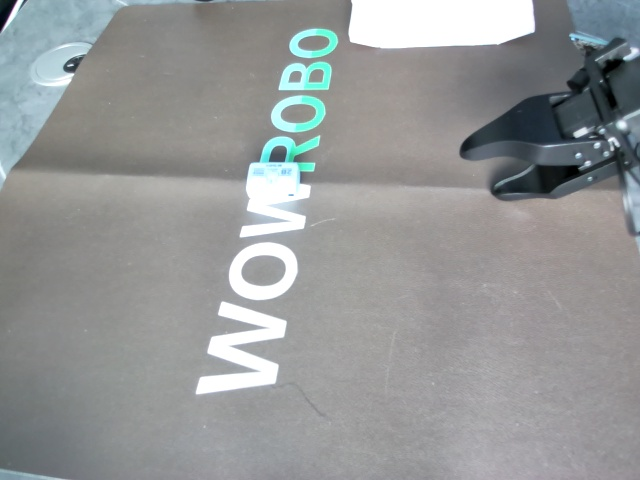

üì∏ cam1 view (E12 - top):


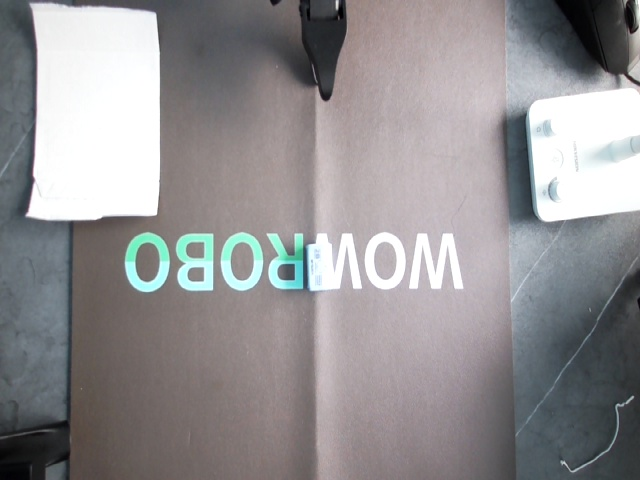

ü§ñ Leader joint angles: [ 91.23  116.895 173.584 -13.271  -8.35   34.893]
ü§ñ Follower joint angles: [ 91.758 129.551 172.529   0.352  -3.34   32.783]


In [7]:




from pathlib import Path
from IPython.display import display
from PIL import Image
import pickle
import numpy as np

# ‚úÖ ËÆæÁΩÆ clip Ë∑ØÂæÑÔºàÂèØÊîπ‰∏∫‰ªªÊÑè clip_xxxxx Êñá‰ª∂Â§πÔºâ
clip_path = Path("/home/wjw/lerobot/results/recordings/clip_00001")
idx = 0  # Ë¶ÅÊü•ÁúãÁöÑÂ∏ßÁºñÂè∑

# ‚úÖ ËØªÂèñÂõæÂÉèË∑ØÂæÑ
cam0_files = sorted((clip_path / "images_cam0").glob("*.jpg"))
cam1_files = sorted((clip_path / "images_cam1").glob("*.jpg"))

# ‚úÖ Âä†ËΩΩ joint_data.pkl
with open(clip_path / "joint_states" / "joint_data.pkl", "rb") as f:
    joint_data = pickle.load(f)

# ‚úÖ Ëé∑ÂèñÂ∏ßÊÄªÊï∞
num_frames = min(len(cam0_files), len(cam1_files), len(joint_data))

# ‚úÖ ÊòæÁ§∫ÂõæÂÉèÂíåÂÖ≥ËäÇÊï∞ÊçÆ
if idx < num_frames:
    img0 = Image.open(cam0_files[idx])
    img1 = Image.open(cam1_files[idx])

    timestamp, q_leader, q_follower = joint_data[idx]

    print("üìÖ Timestamp:", timestamp)
    print("üì∏ cam0 view (E22S - side):")
    display(img0)
    print("üì∏ cam1 view (E12 - top):")
    display(img1)

    print("ü§ñ Leader joint angles:", np.round(q_leader, 3))
    print("ü§ñ Follower joint angles:", np.round(q_follower, 3))
else:
    print(f"‚ö†Ô∏è Not enough frames to preview idx = {idx}")


In [11]:
from pathlib import Path
import pickle
import pandas as pd

# ‚úÖ Ê†πË∑ØÂæÑÔºàÊ†πÊçÆ‰Ω†Á≥ªÁªü‰∏≠Ë∑ØÂæÑÊõ¥Êñ∞Ôºâ
data_root = Path("/home/wjw/lerobot/results/recordings")

# ‚úÖ Ëé∑ÂèñÊâÄÊúâ clip Êñá‰ª∂Â§π
clip_folders = sorted([d for d in data_root.iterdir() if d.is_dir() and d.name.startswith("clip_")])

results = []

# ‚úÖ ÈÅçÂéÜÊØè‰∏™ clip Ê£ÄÊü•ÂõæÂÉèÂíåÂÖ≥ËäÇÊï∞ÊçÆÂ∏ßÊï∞ÊòØÂê¶‰∏ÄËá¥
for clip_path in clip_folders:
    clip_name = clip_path.name

    cam0_dir = clip_path / "images_cam0"
    cam1_dir = clip_path / "images_cam1"
    joint_path = clip_path / "joint_states" / "joint_data.pkl"

    # ËØªÂèñÂõæÂÉèÂ∏ßÊï∞
    cam0_count = len(list(cam0_dir.glob("*.jpg")))
    cam1_count = len(list(cam1_dir.glob("*.jpg")))

    # ËØªÂèñ joint Êï∞ÊçÆÂ∏ßÊï∞
    try:
        with open(joint_path, "rb") as f:
            joint_data = pickle.load(f)
        joint_count = len(joint_data)
    except Exception as e:
        joint_count = 0

    # Ê£ÄÊü•ÊòØÂê¶ÂÆåÂÖ®ÂØπÈΩê
    aligned = (cam0_count == cam1_count == joint_count)

    results.append({
        "Clip": clip_name,
        "cam0_frames": cam0_count,
        "cam1_frames": cam1_count,
        "joint_frames": joint_count,
        "Aligned": "Yes" if aligned else "‚ùå"
    })

# ‚úÖ ËΩ¨Êç¢‰∏∫ DataFrame Âπ∂ÊòæÁ§∫
df_sync = pd.DataFrame(results)
print("‚úÖ Â∏ßÂêåÊ≠•Ê£ÄÊµãÂÆåÊàêÔºåÁªìÊûúÂ¶Ç‰∏ãÔºö")
display(df_sync)

# ‚úÖ Â∞Ü DataFrame ËΩ¨‰∏∫ LaTeX Ë°®Ê†ºÊ†ºÂºè
latex_table = df_sync.to_latex(index=False, caption="Frame Synchronization Summary", label="tab:sync_summary")

# ‚úÖ ‰øùÂ≠òÂà∞ÊåáÂÆöË∑ØÂæÑ
output_path = Path("/home/wjw/lerobot/results/recordings/frame_sync_summary.tex")
with open(output_path, "w") as f:
    f.write(latex_table)

print(f"üìÅ LaTeX Ë°®Ê†ºÂ∑≤‰øùÂ≠òËá≥: {output_path}")


‚úÖ Â∏ßÂêåÊ≠•Ê£ÄÊµãÂÆåÊàêÔºåÁªìÊûúÂ¶Ç‰∏ãÔºö


Clip  cam0_frames  cam1_frames  joint_frames Aligned
0   clip_00001          379          379           379     Yes
1   clip_00002          433          433           433     Yes
2   clip_00003          377          377           377     Yes
3   clip_00004          523          523           523     Yes
4   clip_00005          347          347           347     Yes
5   clip_00006          412          412           412     Yes
6   clip_00007          486          486           486     Yes
7   clip_00008          402          402           402     Yes
8   clip_00009          388          388           388     Yes
9   clip_00010          349          349           349     Yes
10  clip_00011          390          390           390     Yes
11  clip_00012          404          404           404     Yes
12  clip_00013          464          464           464     Yes
13  clip_00014          437          437           437     Yes
14  clip_00015          382          382           382     Yes
15  clip_00016          423          423           423     Yes
16  clip_00017          376          376           376     Yes
17  clip_00018          415          415           415     Yes
18  clip_00019          424          424           424     Yes
19  clip_00020          482          482           482     Yes
20  clip_00021          303          303           303     Yes
21  clip_00022          327          327           327     Yes
22  clip_00023          479          479           479     Yes
23  clip_00024          373          373           373     Yes
24  clip_00025          361          361           361     Yes
25  clip_00026          327          327           327     Yes
26  clip_00027          423          423           423     Yes
27  clip_00028          294          294           294     Yes
28  clip_00029          335          335           335     Yes
29  clip_00030          434          434           434     Yes
30  clip_00031          381          381           381     Yes
31  clip_00032          418          418           418     Yes
32  clip_00033          346          346           346     Yes
33  clip_00034          362          362           362     Yes
34  clip_00035          356          356           356     Yes
35  clip_00036          362          362           362     Yes
36  clip_00037          384          384           384     Yes
37  clip_00038          334          334           334     Yes
38  clip_00039          353          353           353     Yes
39  clip_00040          346          346           346     Yes

üìÅ LaTeX Ë°®Ê†ºÂ∑≤‰øùÂ≠òËá≥: /home/wjw/lerobot/results/recordings/frame_sync_summary.tex


In [12]:
import matplotlib.pyplot as plt

# ‚úÖ ËÆæÁΩÆ‰øùÂ≠òË∑ØÂæÑ
save_path = Path("/home/wjw/lerobot/results/recordings/frame_sync_summary.png")

# ‚úÖ ËÆæÁΩÆÁîªÂ∏ÉÂ§ßÂ∞èÔºàÊ†πÊçÆË°åÊï∞ÂèØË∞ÉÊï¥Ôºâ
fig, ax = plt.subplots(figsize=(12, 0.4 * len(df_sync) + 2))

# ‚úÖ ÁªòÂà∂Ë°®Ê†ºÔºàÂéªÊéâÁ¥¢ÂºïÔºâ
ax.axis('off')
table = ax.table(cellText=df_sync.values,
                 colLabels=df_sync.columns,
                 cellLoc='center',
                 loc='center')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)  # ÊîæÂ§ßË°®Ê†º

# ‚úÖ ‰øùÂ≠ò‰∏∫ PNG ÂõæÁâá
plt.tight_layout()
plt.savefig(save_path, dpi=300)
plt.close()

print(f"üñºÔ∏è Ë°®Ê†ºÂ∑≤‰øùÂ≠ò‰∏∫ÂõæÁâáÔºö{save_path}")


üñºÔ∏è Ë°®Ê†ºÂ∑≤‰øùÂ≠ò‰∏∫ÂõæÁâáÔºö/home/wjw/lerobot/results/recordings/frame_sync_summary.png


### ËΩ®ËøπÂèØËßÜÂåñ‰ª£Á†Å

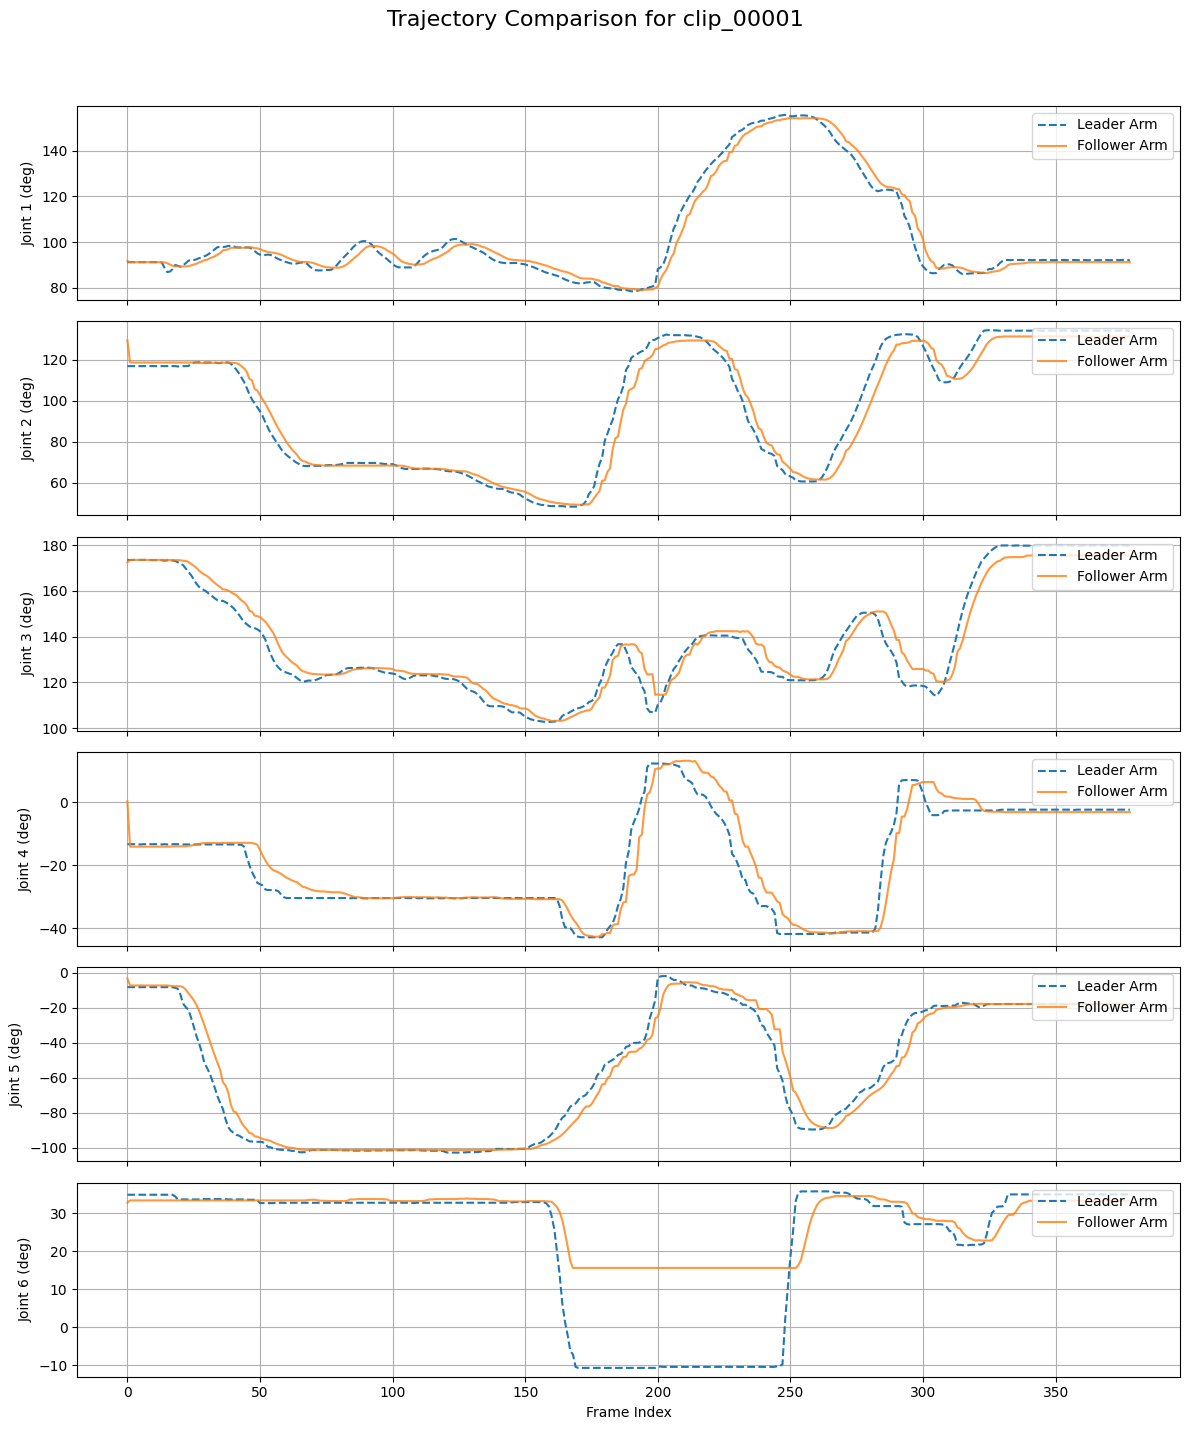

In [15]:


import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import pickle

# ‚úÖ ËÆæÁΩÆ clip Ë∑ØÂæÑÔºàÂèØÊõ¥Êîπ‰∏∫‰ªªÊÑè clipÔºâ
clip_path = Path("/home/wjw/lerobot/results/recordings/clip_00001")
joint_file = clip_path / "joint_states" / "joint_data.pkl"

# ‚úÖ ËØªÂèñ joint_data.pkl
with open(joint_file, "rb") as f:
    joint_data = pickle.load(f)

# ‚úÖ ÊèêÂèñ leader Âíå follower ËΩ®ËøπÔºàÂøΩÁï•Êó∂Èó¥Êà≥Ôºâ
leader_trajectories = np.array([entry[1] for entry in joint_data])  # N x 6
follower_trajectories = np.array([entry[2] for entry in joint_data])
time = np.arange(len(leader_trajectories))  # Â∏ßÁ¥¢Âºï

# ‚úÖ Ëé∑ÂèñÂÖ≥ËäÇÊï∞ÈáèÔºàÈªòËÆ§ 6Ôºâ
num_joints = leader_trajectories.shape[1]

# ‚úÖ ÂèØËßÜÂåñÊØè‰∏™ÂÖ≥ËäÇÁöÑ‰∏ª‰ªéËΩ®Ëøπ
fig, axes = plt.subplots(num_joints, 1, figsize=(12, 2.5 * num_joints), sharex=True)
for j in range(num_joints):
    axes[j].plot(time, leader_trajectories[:, j], label="Leader Arm", linestyle='--')
    axes[j].plot(time, follower_trajectories[:, j], label="Follower Arm", alpha=0.8)
    axes[j].set_ylabel(f"Joint {j+1} (deg)")
    axes[j].legend(loc="upper right")
    axes[j].grid(True)

axes[-1].set_xlabel("Frame Index")
fig.suptitle(f"Trajectory Comparison for {clip_path.name}", fontsize=16)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import pickle

data_root = Path("/home/wjw/lerobot/results/recordings")
clip_folders = sorted([d for d in data_root.iterdir() if d.is_dir() and d.name.startswith("clip_")])
save_dir = data_root / "trajectory_plots"
save_dir.mkdir(exist_ok=True)

for clip_path in clip_folders:
    joint_file = clip_path / "joint_states" / "joint_data.pkl"
    try:
        with open(joint_file, "rb") as f:
            joint_data = pickle.load(f)
        leader_trajectories = np.array([entry[1] for entry in joint_data])
        follower_trajectories = np.array([entry[2] for entry in joint_data])
        time = np.arange(len(leader_trajectories))
        num_joints = leader_trajectories.shape[1]
        fig, axes = plt.subplots(num_joints, 1, figsize=(12, 2.5 * num_joints), sharex=True)
        for j in range(num_joints):
            axes[j].plot(time, leader_trajectories[:, j], label="Leader Arm", linestyle='--')
            axes[j].plot(time, follower_trajectories[:, j], label="Follower Arm", alpha=0.8)
            axes[j].set_ylabel(f"Joint {j+1} (deg)")
            axes[j].legend(loc="upper right")
            axes[j].grid(True)
        axes[-1].set_xlabel("Frame Index")
        fig.suptitle(f"Trajectory Comparison for {clip_path.name}", fontsize=16)
        fig.tight_layout(rect=[0, 0.03, 1, 0.95])
        fig.savefig(save_dir / f"{clip_path.name}_trajectory.png", dpi=200)
        plt.close(fig)
    except Exception as e:
        print(f"‚ùå Failed to process {clip_path.name}: {e}")

print(f"‚úÖ ÊâÄÊúâËΩ®ËøπÂõæÂ∑≤‰øùÂ≠òËá≥: {save_dir}")


‚úÖ ÊâÄÊúâËΩ®ËøπÂõæÂ∑≤‰øùÂ≠òËá≥: /home/wjw/lerobot/results/recordings/trajectory_plots


### ‰∏ª‰ªéÊú∫Ê¢∞ËáÇÂÖ≥ËäÇËßíÂ∫¶ËØØÂ∑ÆÂàÜÊûêÔºàPosition Error AnalysisÔºâÔºå

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import pickle
import pandas as pd

# ‚úÖ ËÆæÁΩÆÊ†πÁõÆÂΩï
data_root = Path("/home/wjw/lerobot/results/recordings")
clip_folders = sorted([d for d in data_root.iterdir() if d.is_dir() and d.name.startswith("clip_")])
save_dir = data_root / "error_analysis_plots"
save_dir.mkdir(exist_ok=True)

summary_list = []

# ‚úÖ ÈÅçÂéÜÊØè‰∏™ clip ÂàÜÊûêËØØÂ∑Æ
for clip_path in clip_folders:
    joint_file = clip_path / "joint_states" / "joint_data.pkl"
    try:
        with open(joint_file, "rb") as f:
            joint_data = pickle.load(f)
        
        leader_trajectories = np.array([entry[1] for entry in joint_data])
        follower_trajectories = np.array([entry[2] for entry in joint_data])

        if leader_trajectories.shape != follower_trajectories.shape:
            print(f"‚ùå {clip_path.name} Êï∞ÊçÆÁª¥Â∫¶‰∏ç‰∏ÄËá¥")
            continue

        errors = leader_trajectories - follower_trajectories
        num_joints = errors.shape[1]
        time = np.arange(errors.shape[0])

        # ‚úÖ ÂèØËßÜÂåñËØØÂ∑ÆÊõ≤Á∫ø
        fig, axes = plt.subplots(num_joints, 1, figsize=(12, 2.5 * num_joints), sharex=True)
        for j in range(num_joints):
            axes[j].plot(time, errors[:, j], label="Error", color="red")
            axes[j].axhline(0, color='black', linestyle='--', linewidth=0.8)
            axes[j].set_ylabel(f"Joint {j+1} Error (rad)")
            axes[j].grid(True)
        axes[-1].set_xlabel("Frame Index")
        fig.suptitle(f"Joint Angle Error: {clip_path.name}", fontsize=16)
        fig.tight_layout(rect=[0, 0.03, 1, 0.95])
        fig.savefig(save_dir / f"{clip_path.name}_error.png", dpi=200)
        plt.close(fig)

        # ‚úÖ ‰øùÂ≠ò clip Á∫ßËØØÂ∑ÆÁªüËÆ°
        summary_list.append({
            "Clip": clip_path.name,
            **{f"Mean_J{i+1}": np.mean(errors[:, i]) for i in range(num_joints)},
            **{f"Max_J{i+1}": np.max(np.abs(errors[:, i])) for i in range(num_joints)},
            **{f"Std_J{i+1}": np.std(errors[:, i]) for i in range(num_joints)}
        })

    except Exception as e:
        print(f"‚ùå Failed to process {clip_path.name}: {e}")

# ‚úÖ Ê±áÊÄªÊâÄÊúâ clip ÁöÑËØØÂ∑ÆÁªüËÆ°Ë°®Ê†º
error_df_all = pd.DataFrame(summary_list)
csv_path = data_root / "error_summary_all.csv"
error_df_all.to_csv(csv_path, index=False)
print(f"‚úÖ ÊâÄÊúâËØØÂ∑ÆÂõæÂ∑≤‰øùÂ≠òËá≥: {save_dir}")
print(f"‚úÖ Ê±áÊÄªËØØÂ∑ÆÁªüËÆ°Ë°®Â∑≤‰øùÂ≠òËá≥: {csv_path}")


‚úÖ ÊâÄÊúâËØØÂ∑ÆÂõæÂ∑≤‰øùÂ≠òËá≥: /home/wjw/lerobot/results/recordings/error_analysis_plots
‚úÖ Ê±áÊÄªËØØÂ∑ÆÁªüËÆ°Ë°®Â∑≤‰øùÂ≠òËá≥: /home/wjw/lerobot/results/recordings/error_summary_all.csv


### ‰Ω†ËøôÊÆµ‰ª£Á†ÅÁî®‰∫éÂàÜÊûê‰∏ª‰ªéÊú∫Ê¢∞ËáÇÁöÑ ËßíÈÄüÂ∫¶Ôºàjoint velocityÔºâÔºå‰πüÂ∞±ÊòØÁõ∏ÈÇªÂ∏ß‰πãÈó¥ÁöÑÂÖ≥ËäÇËßíÂ∫¶ÂèòÂåñÔºåÁî®‰∫éËØÑ‰º∞ÊéßÂà∂ÁöÑ‚ÄúÂπ≥ÊªëÊÄß‚ÄùÂíå‚ÄúÂìçÂ∫îÈÄüÂ∫¶‚Äù„ÄÇ

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import pickle

# ‚úÖ ËÆæÁΩÆÊ†πÁõÆÂΩï
data_root = Path("/home/wjw/lerobot/results/recordings")
clip_folders = sorted([d for d in data_root.iterdir() if d.is_dir() and d.name.startswith("clip_")])
save_dir = data_root / "velocity_plots"
save_dir.mkdir(exist_ok=True)

# ‚úÖ ÈÅçÂéÜÊØè‰∏™ clip
for clip_path in clip_folders:
    joint_file = clip_path / "joint_states" / "joint_data.pkl"

    try:
        with open(joint_file, "rb") as f:
            joint_data = pickle.load(f)

        # ÊèêÂèñ leader / follower ËΩ®Ëøπ
        leader_trajectories = np.array([entry[1] for entry in joint_data])
        follower_trajectories = np.array([entry[2] for entry in joint_data])

        if leader_trajectories.shape != follower_trajectories.shape:
            print(f"‚ö†Ô∏è {clip_path.name} Êï∞ÊçÆÁª¥Â∫¶‰∏ç‰∏ÄËá¥ÔºåË∑≥Ëøá„ÄÇ")
            continue

        # ‚úÖ ËÆ°ÁÆóËßíÈÄüÂ∫¶
        leader_velocity = np.diff(leader_trajectories, axis=0)
        follower_velocity = np.diff(follower_trajectories, axis=0)
        time = np.arange(len(leader_velocity))
        num_joints = leader_velocity.shape[1]

        # ‚úÖ ÁªòÂà∂ÂõæÂÉè
        fig, axes = plt.subplots(num_joints, 1, figsize=(12, 2.5 * num_joints), sharex=True)
        for j in range(num_joints):
            axes[j].plot(time, leader_velocity[:, j], label="Leader Velocity", linestyle="--", color="blue")
            axes[j].plot(time, follower_velocity[:, j], label="Follower Velocity", linestyle="-", color="orange")
            axes[j].set_ylabel(f"Joint {j+1} vel (rad/frame)")
            axes[j].legend(loc="upper right")
            axes[j].grid(True)

        axes[-1].set_xlabel("Frame Index")
        fig.suptitle(f"Joint Velocity Analysis: {clip_path.name}", fontsize=16)
        fig.tight_layout(rect=[0, 0.03, 1, 0.95])

        fig.savefig(save_dir / f"{clip_path.name}_velocity.png", dpi=200)
        plt.close(fig)

    except Exception as e:
        print(f"‚ùå Failed to process {clip_path.name}: {e}")

print(f"‚úÖ ÊâÄÊúâËßíÈÄüÂ∫¶ÂõæÂ∑≤‰øùÂ≠òËá≥: {save_dir}")


‚úÖ ÊâÄÊúâËßíÈÄüÂ∫¶ÂõæÂ∑≤‰øùÂ≠òËá≥: /home/wjw/lerobot/results/recordings/velocity_plots


### ÈùûÂ∏∏Â•ΩÔºÅ‰Ω†ËøôÊÆµ‰ª£Á†ÅÁî®‰∫éËÆ°ÁÆó‰∏ª‰ªéËáÇÂú®ÊØè‰∏ÄÂ∏ßÁöÑ ÂÖ≥ËäÇËßíËØØÂ∑ÆÂùáÊñπÂÄºÔºàMSEÔºâÔºåÂπ∂ÂèØËßÜÂåñËØØÂ∑ÆÈöèÊó∂Èó¥ÁöÑÂèòÂåñÔºåÁî®‰∫éËØÑ‰º∞Ê®°‰ªøË°å‰∏∫ÁöÑÊï¥‰ΩìÁ®≥ÂÆöÊÄßÂíåÂπ≥ÊªëÂ∫¶„ÄÇ



In [18]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import pickle
import pandas as pd

# ‚úÖ ËÆæÁΩÆÊ†πÁõÆÂΩï
data_root = Path("/home/wjw/lerobot/results/recordings")
clip_folders = sorted([d for d in data_root.iterdir() if d.is_dir() and d.name.startswith("clip_")])
save_dir = data_root / "mse_plots"
save_dir.mkdir(exist_ok=True)

summary = []

# ‚úÖ ÈÅçÂéÜÊØè‰∏™ clip ËøõË°å MSE ÂàÜÊûê
for clip_path in clip_folders:
    joint_file = clip_path / "joint_states" / "joint_data.pkl"

    try:
        with open(joint_file, "rb") as f:
            joint_data = pickle.load(f)

        leader = np.array([entry[1] for entry in joint_data])
        follower = np.array([entry[2] for entry in joint_data])

        if leader.shape != follower.shape:
            print(f"‚ö†Ô∏è {clip_path.name} ‰∏ª‰ªéÊï∞ÊçÆÁª¥Â∫¶‰∏ç‰∏ÄËá¥ÔºåË∑≥Ëøá")
            continue

        # ‚úÖ ÈÄêÂ∏ß MSEÔºöÊØèÂ∏ßÂÖ≥ËäÇËØØÂ∑ÆÂπ≥ÊñπÁöÑÂùáÂÄº
        mse_per_frame = np.mean((leader - follower) ** 2, axis=1)
        overall_mse = np.mean(mse_per_frame)

        # ‚úÖ ‰øùÂ≠òÂõæÂÉè
        plt.figure(figsize=(12, 4))
        plt.plot(mse_per_frame, label="MSE (rad¬≤)", color='red')
        plt.xlabel("Frame Index")
        plt.ylabel("MSE")
        plt.title(f"MSE Over Time: {clip_path.name}")
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.savefig(save_dir / f"{clip_path.name}_mse_curve.png", dpi=200)
        plt.close()

        summary.append({
            "Clip": clip_path.name,
            "Total Frames": len(mse_per_frame),
            "Overall MSE (rad^2)": overall_mse
        })

    except Exception as e:
        print(f"‚ùå Failed to process {clip_path.name}: {e}")

# ‚úÖ Ê±áÊÄªËæìÂá∫ CSV Ë°®Ê†º
df_mse = pd.DataFrame(summary)
csv_path = data_root / "mse_summary.csv"
df_mse.to_csv(csv_path, index=False)

print(f"‚úÖ ÊâÄÊúâ MSE Êõ≤Á∫øÂõæ‰øùÂ≠òËá≥: {save_dir}")
print(f"‚úÖ ÂÖ®Â±Ä MSE Ë°®Ê†º‰øùÂ≠òËá≥: {csv_path}")


‚úÖ ÊâÄÊúâ MSE Êõ≤Á∫øÂõæ‰øùÂ≠òËá≥: /home/wjw/lerobot/results/recordings/mse_plots
‚úÖ ÂÖ®Â±Ä MSE Ë°®Ê†º‰øùÂ≠òËá≥: /home/wjw/lerobot/results/recordings/mse_summary.csv


### ‚úÖ ÊâπÈáèÁîüÊàêÂèåËßÜËßíËßÜÈ¢ëÔºàÈÄÇÈÖç LeRobot clip ÁªìÊûÑÔºâ

In [19]:
import cv2
import pickle
from pathlib import Path

# ‚úÖ ËÆæÁΩÆÊ†πË∑ØÂæÑÔºåÈÅçÂéÜÊâÄÊúâ clip_xxxxx Êñá‰ª∂Â§π
recording_root = Path("/home/wjw/lerobot/results/recordings")
clip_dirs = sorted([p for p in recording_root.glob("clip_*") if p.is_dir()])

# ‚úÖ ËßÜÈ¢ëÂèÇÊï∞
fps = 30
frame_size = (640, 480)
combined_size = (frame_size[0] * 2, frame_size[1])
fourcc = cv2.VideoWriter_fourcc(*'mp4v')

font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 0.5
font_color = (0, 255, 0)
thickness = 1

for clip_path in clip_dirs:
    cam0_dir = clip_path / "images_cam0"
    cam1_dir = clip_path / "images_cam1"
    joint_pkl = clip_path / "joint_states" / "joint_data.pkl"
    save_path = clip_path / "joint_overlay.mp4"

    if not joint_pkl.exists():
        print(f"‚ùå Ë∑≥Ëøá {clip_path.name}ÔºåÊú™ÊâæÂà∞ joint_data.pkl")
        continue

    try:
        with open(joint_pkl, "rb") as f:
            joint_data = pickle.load(f)
    except Exception as e:
        print(f"‚ùå Êó†Ê≥ïËØªÂèñ {clip_path.name} ÁöÑ joint_data.pkl: {e}")
        continue

    video_writer = cv2.VideoWriter(str(save_path), fourcc, fps, combined_size)
    written = 0

    for i, (timestamp, leader, follower) in enumerate(joint_data):
        img_path_cam0 = cam0_dir / f"frame_{i:05d}.jpg"
        img_path_cam1 = cam1_dir / f"frame_{i:05d}.jpg"

        if not img_path_cam0.exists() or not img_path_cam1.exists():
            continue

        img0 = cv2.imread(str(img_path_cam0))
        img1 = cv2.imread(str(img_path_cam1))
        if img0 is None or img1 is None:
            continue

        img0 = cv2.resize(img0, frame_size)
        img1 = cv2.resize(img1, frame_size)
        combined_img = cv2.hconcat([img0, img1])

        lines = [f"Frame {i:03d}"]
        for j in range(6):
            lines.append(f"L-J{j+1}: {leader[j]:.1f}, F-J{j+1}: {follower[j]:.1f}")

        for j, text in enumerate(lines):
            cv2.putText(combined_img, text, (10, 25 + j * 20), font, font_scale, font_color, thickness, cv2.LINE_AA)

        video_writer.write(combined_img)
        written += 1

    video_writer.release()
    print(f"‚úÖ [{clip_path.name}] ÊàêÂäüÂÜôÂÖ•ËßÜÈ¢ëÂ∏ßÊï∞: {written}Ôºå‰øùÂ≠ò‰∏∫: {save_path.name}")


‚úÖ [clip_00001] ÊàêÂäüÂÜôÂÖ•ËßÜÈ¢ëÂ∏ßÊï∞: 379Ôºå‰øùÂ≠ò‰∏∫: joint_overlay.mp4
‚úÖ [clip_00002] ÊàêÂäüÂÜôÂÖ•ËßÜÈ¢ëÂ∏ßÊï∞: 433Ôºå‰øùÂ≠ò‰∏∫: joint_overlay.mp4
‚úÖ [clip_00003] ÊàêÂäüÂÜôÂÖ•ËßÜÈ¢ëÂ∏ßÊï∞: 377Ôºå‰øùÂ≠ò‰∏∫: joint_overlay.mp4
‚úÖ [clip_00004] ÊàêÂäüÂÜôÂÖ•ËßÜÈ¢ëÂ∏ßÊï∞: 523Ôºå‰øùÂ≠ò‰∏∫: joint_overlay.mp4
‚úÖ [clip_00005] ÊàêÂäüÂÜôÂÖ•ËßÜÈ¢ëÂ∏ßÊï∞: 347Ôºå‰øùÂ≠ò‰∏∫: joint_overlay.mp4
‚úÖ [clip_00006] ÊàêÂäüÂÜôÂÖ•ËßÜÈ¢ëÂ∏ßÊï∞: 412Ôºå‰øùÂ≠ò‰∏∫: joint_overlay.mp4
‚úÖ [clip_00007] ÊàêÂäüÂÜôÂÖ•ËßÜÈ¢ëÂ∏ßÊï∞: 486Ôºå‰øùÂ≠ò‰∏∫: joint_overlay.mp4
‚úÖ [clip_00008] ÊàêÂäüÂÜôÂÖ•ËßÜÈ¢ëÂ∏ßÊï∞: 402Ôºå‰øùÂ≠ò‰∏∫: joint_overlay.mp4
‚úÖ [clip_00009] ÊàêÂäüÂÜôÂÖ•ËßÜÈ¢ëÂ∏ßÊï∞: 388Ôºå‰øùÂ≠ò‰∏∫: joint_overlay.mp4
‚úÖ [clip_00010] ÊàêÂäüÂÜôÂÖ•ËßÜÈ¢ëÂ∏ßÊï∞: 349Ôºå‰øùÂ≠ò‰∏∫: joint_overlay.mp4
‚úÖ [clip_00011] ÊàêÂäüÂÜôÂÖ•ËßÜÈ¢ëÂ∏ßÊï∞: 390Ôºå‰øùÂ≠ò‰∏∫: joint_overlay.mp4
‚úÖ [clip_00012] ÊàêÂäüÂÜôÂÖ•ËßÜÈ¢ëÂ∏ßÊï∞: 404Ôºå‰øùÂ≠ò‰∏∫: joint_overlay.mp4
‚úÖ [clip_00013] ÊàêÂäüÂÜôÂÖ•ËßÜÈ¢ëÂ∏ßÊï∞: 464Ôºå‰øùÂ≠ò‰∏∫: join

### ËØØÂ∑ÆÂä®ÊÄÅÁÉ≠Âõæ‚Äù

‚úÖ Âä®ÊÄÅËØØÂ∑ÆÁÉ≠ÂõæÂ∑≤‰øùÂ≠òËá≥: /home/wjw/lerobot/results/recordings/clip_00001/error_heatmap.mp4


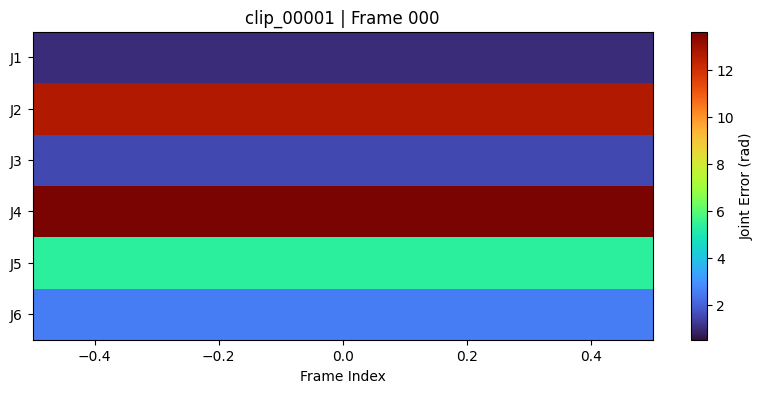

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from pathlib import Path
import pickle

# ‚úÖ ËÆæÁΩÆË¶ÅÂ§ÑÁêÜÁöÑ clipÔºà‰Ω†‰πüÂèØ‰ª•ÊâπÈáèÂ§ÑÁêÜÊâÄÊúâÔºâ
clip_path = Path("/home/wjw/lerobot/results/recordings/clip_00001")
pkl_path = clip_path / "joint_states/joint_data.pkl"
save_path = clip_path / "error_heatmap.mp4"

# ‚úÖ ËØªÂèñ joint_data.pkl
with open(pkl_path, "rb") as f:
    joint_data = pickle.load(f)

# ‚úÖ ÊèêÂèñ‰∏ª‰ªéÂÖ≥ËäÇËßíÂ∫¶
leader = np.array([entry[1] for entry in joint_data])  # N x 6
follower = np.array([entry[2] for entry in joint_data])

# ‚úÖ ËÆ°ÁÆóÈÄêÂ∏ßËØØÂ∑ÆÔºàÁªùÂØπÂÄºÔºâ
errors = np.abs(leader - follower).T  # shape: 6 x N (‰æø‰∫éÁÉ≠ÂõæÊòæÁ§∫)

# ‚úÖ ËÆæÁΩÆÁÉ≠ÂõæÂä®Áîª‰øùÂ≠òË∑ØÂæÑ
fig, ax = plt.subplots(figsize=(10, 4))
cax = ax.imshow(errors[:, :1], aspect='auto', cmap='turbo', interpolation='nearest')
cb = fig.colorbar(cax)
cb.set_label("Joint Error (rad)")

ax.set_yticks(range(6))
ax.set_yticklabels([f"J{i+1}" for i in range(6)])
ax.set_xlabel("Frame Index")

# ‚úÖ Êõ¥Êñ∞ÂáΩÊï∞ÔºàÂä®ÊÄÅÂΩí‰∏ÄÂåñÈ¢úËâ≤Ôºâ
def update(frame):
    ax.clear()
    current_error = errors[:, :frame+1]
    vmax = np.max(current_error)
    cax = ax.imshow(current_error, aspect='auto', cmap='turbo', vmin=0, vmax=max(vmax, 1e-3))
    ax.set_title(f"{clip_path.name} | Frame {frame:03d}")
    ax.set_yticks(range(6))
    ax.set_yticklabels([f"J{i+1}" for i in range(6)])
    ax.set_xlabel("Frame Index")
    return [cax]

# ‚úÖ ÂàõÂª∫Âä®Áîª
ani = animation.FuncAnimation(fig, update, frames=errors.shape[1], interval=40, blit=False)

# ‚úÖ ‰øùÂ≠ò‰∏∫ MP4
save_path.parent.mkdir(exist_ok=True, parents=True)
ani.save(save_path, fps=25, dpi=200)
print(f"‚úÖ Âä®ÊÄÅËØØÂ∑ÆÁÉ≠ÂõæÂ∑≤‰øùÂ≠òËá≥: {save_path}")


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import pickle

# ‚úÖ ËÆæÁΩÆÊ†πÁõÆÂΩïÔºåÈÅçÂéÜÊâÄÊúâ clip Êñá‰ª∂Â§π
recording_root = Path("/home/wjw/lerobot/results/recordings")
clip_dirs = sorted([p for p in recording_root.glob("clip_*") if p.is_dir()])

for clip_path in clip_dirs:
    joint_path = clip_path / "joint_states/joint_data.pkl"
    save_path = clip_path / "error_heatmap.png"

    if not joint_path.exists():
        print(f"‚ö†Ô∏è Ë∑≥Ëøá {clip_path.name}Ôºåjoint_data.pkl ‰∏çÂ≠òÂú®")
        continue

    try:
        with open(joint_path, "rb") as f:
            joint_data = pickle.load(f)
    except Exception as e:
        print(f"‚ùå ËØªÂèñÂ§±Ë¥• {clip_path.name}: {e}")
        continue

    # ‚úÖ ÊèêÂèñ leader Âíå follower Êï∞ÊçÆ
    leader = np.array([entry[1] for entry in joint_data])
    follower = np.array([entry[2] for entry in joint_data])
    errors = np.abs(leader - follower).T  # shape: 6 x N

    # ‚úÖ ÁªòÂà∂ÈùôÊÄÅÁÉ≠ÂäõÂõæ
    fig, ax = plt.subplots(figsize=(10, 4))
    im = ax.imshow(errors, aspect='auto', cmap='turbo', interpolation='nearest')
    cbar = fig.colorbar(im)
    cbar.set_label("Joint Error (rad)")

    ax.set_title(f"{clip_path.name} - Static Joint Error Heatmap")
    ax.set_yticks(range(6))
    ax.set_yticklabels([f"J{i+1}" for i in range(6)])
    ax.set_xlabel("Frame Index")

    plt.tight_layout()
    plt.savefig(save_path, dpi=200)
    plt.close()

    print(f"‚úÖ ÁîüÊàêÈùôÊÄÅÁÉ≠Âõæ: {save_path.name}")


‚úÖ ÁîüÊàêÈùôÊÄÅÁÉ≠Âõæ: error_heatmap.png
‚úÖ ÁîüÊàêÈùôÊÄÅÁÉ≠Âõæ: error_heatmap.png
‚úÖ ÁîüÊàêÈùôÊÄÅÁÉ≠Âõæ: error_heatmap.png
‚úÖ ÁîüÊàêÈùôÊÄÅÁÉ≠Âõæ: error_heatmap.png
‚úÖ ÁîüÊàêÈùôÊÄÅÁÉ≠Âõæ: error_heatmap.png
‚úÖ ÁîüÊàêÈùôÊÄÅÁÉ≠Âõæ: error_heatmap.png
‚úÖ ÁîüÊàêÈùôÊÄÅÁÉ≠Âõæ: error_heatmap.png
‚úÖ ÁîüÊàêÈùôÊÄÅÁÉ≠Âõæ: error_heatmap.png
‚úÖ ÁîüÊàêÈùôÊÄÅÁÉ≠Âõæ: error_heatmap.png
‚úÖ ÁîüÊàêÈùôÊÄÅÁÉ≠Âõæ: error_heatmap.png
‚úÖ ÁîüÊàêÈùôÊÄÅÁÉ≠Âõæ: error_heatmap.png
‚úÖ ÁîüÊàêÈùôÊÄÅÁÉ≠Âõæ: error_heatmap.png
‚úÖ ÁîüÊàêÈùôÊÄÅÁÉ≠Âõæ: error_heatmap.png
‚úÖ ÁîüÊàêÈùôÊÄÅÁÉ≠Âõæ: error_heatmap.png
‚úÖ ÁîüÊàêÈùôÊÄÅÁÉ≠Âõæ: error_heatmap.png
‚úÖ ÁîüÊàêÈùôÊÄÅÁÉ≠Âõæ: error_heatmap.png
‚úÖ ÁîüÊàêÈùôÊÄÅÁÉ≠Âõæ: error_heatmap.png
‚úÖ ÁîüÊàêÈùôÊÄÅÁÉ≠Âõæ: error_heatmap.png
‚úÖ ÁîüÊàêÈùôÊÄÅÁÉ≠Âõæ: error_heatmap.png
‚úÖ ÁîüÊàêÈùôÊÄÅÁÉ≠Âõæ: error_heatmap.png
‚úÖ ÁîüÊàêÈùôÊÄÅÁÉ≠Âõæ: error_heatmap.png
‚úÖ ÁîüÊàêÈùôÊÄÅÁÉ≠Âõæ: error_heatmap.png
‚úÖ ÁîüÊàêÈùôÊÄÅÁÉ≠Âõæ: error_heatmap.png
‚úÖ ÁîüÊàêÈùôÊÄÅÁÉ≠Âõæ: error_heat

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import pickle
import shutil

# ‚úÖ Ê†πË∑ØÂæÑÔºöÈÅçÂéÜÊâÄÊúâ clip Êñá‰ª∂Â§π
recording_root = Path("/home/wjw/lerobot/results/recordings")
clip_dirs = sorted([p for p in recording_root.glob("clip_*") if p.is_dir()])

# ‚úÖ Áªü‰∏ÄËæìÂá∫Ë∑ØÂæÑ
output_dir = Path("/home/wjw/lerobot/results/error_heatmaps")
output_dir.mkdir(parents=True, exist_ok=True)

for clip_path in clip_dirs:
    joint_path = clip_path / "joint_states/joint_data.pkl"
    clip_name = clip_path.name
    save_path = output_dir / f"{clip_name}_error_heatmap.png"

    if not joint_path.exists():
        print(f"‚ö†Ô∏è Ë∑≥Ëøá {clip_name}Ôºåjoint_data.pkl ‰∏çÂ≠òÂú®")
        continue

    try:
        with open(joint_path, "rb") as f:
            joint_data = pickle.load(f)
    except Exception as e:
        print(f"‚ùå ËØªÂèñÂ§±Ë¥• {clip_name}: {e}")
        continue

    leader = np.array([entry[1] for entry in joint_data])
    follower = np.array([entry[2] for entry in joint_data])
    errors = np.abs(leader - follower).T  # shape: 6 x N

    fig, ax = plt.subplots(figsize=(10, 4))
    im = ax.imshow(errors, aspect='auto', cmap='turbo', interpolation='nearest')
    cbar = fig.colorbar(im)
    cbar.set_label("Joint Error (rad)")

    ax.set_title(f"{clip_name} - Static Joint Error Heatmap")
    ax.set_yticks(range(6))
    ax.set_yticklabels([f"J{i+1}" for i in range(6)])
    ax.set_xlabel("Frame Index")

    plt.tight_layout()
    plt.savefig(save_path, dpi=200)
    plt.close()

    print(f"‚úÖ ÁÉ≠ÂõæÂ∑≤‰øùÂ≠òÔºö{save_path.name}")


‚úÖ ÁÉ≠ÂõæÂ∑≤‰øùÂ≠òÔºöclip_00001_error_heatmap.png
‚úÖ ÁÉ≠ÂõæÂ∑≤‰øùÂ≠òÔºöclip_00002_error_heatmap.png
‚úÖ ÁÉ≠ÂõæÂ∑≤‰øùÂ≠òÔºöclip_00003_error_heatmap.png
‚úÖ ÁÉ≠ÂõæÂ∑≤‰øùÂ≠òÔºöclip_00004_error_heatmap.png
‚úÖ ÁÉ≠ÂõæÂ∑≤‰øùÂ≠òÔºöclip_00005_error_heatmap.png
‚úÖ ÁÉ≠ÂõæÂ∑≤‰øùÂ≠òÔºöclip_00006_error_heatmap.png
‚úÖ ÁÉ≠ÂõæÂ∑≤‰øùÂ≠òÔºöclip_00007_error_heatmap.png
‚úÖ ÁÉ≠ÂõæÂ∑≤‰øùÂ≠òÔºöclip_00008_error_heatmap.png
‚úÖ ÁÉ≠ÂõæÂ∑≤‰øùÂ≠òÔºöclip_00009_error_heatmap.png
‚úÖ ÁÉ≠ÂõæÂ∑≤‰øùÂ≠òÔºöclip_00010_error_heatmap.png
‚úÖ ÁÉ≠ÂõæÂ∑≤‰øùÂ≠òÔºöclip_00011_error_heatmap.png
‚úÖ ÁÉ≠ÂõæÂ∑≤‰øùÂ≠òÔºöclip_00012_error_heatmap.png
‚úÖ ÁÉ≠ÂõæÂ∑≤‰øùÂ≠òÔºöclip_00013_error_heatmap.png
‚úÖ ÁÉ≠ÂõæÂ∑≤‰øùÂ≠òÔºöclip_00014_error_heatmap.png
‚úÖ ÁÉ≠ÂõæÂ∑≤‰øùÂ≠òÔºöclip_00015_error_heatmap.png
‚úÖ ÁÉ≠ÂõæÂ∑≤‰øùÂ≠òÔºöclip_00016_error_heatmap.png
‚úÖ ÁÉ≠ÂõæÂ∑≤‰øùÂ≠òÔºöclip_00017_error_heatmap.png
‚úÖ ÁÉ≠ÂõæÂ∑≤‰øùÂ≠òÔºöclip_00018_error_heatmap.png
‚úÖ ÁÉ≠ÂõæÂ∑≤‰øùÂ≠òÔºöclip_00019_error_heatmap.png
‚úÖ ÁÉ≠ÂõæÂ∑≤‰øùÂ≠òÔºöclip_0002

### Èò∂ÊÆµÂõõÔºöÊ®°‰ªøÂ≠¶‰π†ACTÁÆóÊ≥ï


In [17]:
import numpy as np
from pathlib import Path
from sklearn.model_selection import train_test_split
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader



In [18]:
#‚úÖ Cell 2: ËÆæÁΩÆË∑ØÂæÑÂπ∂Âä†ËΩΩÊï∞ÊçÆs/policy/act_state_only.yaml

data_root = Path("/home/wjw/lerobot/results/recordings")
data_files = sorted(data_root.glob("clip_*/joint_states/state_action.npy"))
print(f"üìÇ ÂÖ±ËΩΩÂÖ• {len(data_files)} Êù°ËÆ∞ÂΩï")

states, actions = [], []
for f in data_files:
    data = np.load(f, allow_pickle=True)
    states.append(data[:, :6])
    actions.append(data[:, 6:])
states = np.concatenate(states, axis=0)
actions = np.concatenate(actions, axis=0)

print(f"‚úÖ ÂêàÂπ∂Êï∞ÊçÆÂÆåÊàê: Áä∂ÊÄÅÁª¥Â∫¶: {states.shape}, Âä®‰ΩúÁª¥Â∫¶: {actions.shape}")


üìÇ ÂÖ±ËΩΩÂÖ• 10 Êù°ËÆ∞ÂΩï
‚úÖ ÂêàÂπ∂Êï∞ÊçÆÂÆåÊàê: Áä∂ÊÄÅÁª¥Â∫¶: (4096, 6), Âä®‰ΩúÁª¥Â∫¶: (4096, 6)


In [19]:
#‚úÖ Cell 3: ÊûÑÂª∫ chunk Â∫èÂàó

chunk_size = 10
X, y = [], []
for i in range(len(states) - chunk_size):
    X.append(states[i:i+chunk_size])
    y.append(actions[i+chunk_size-1])
X = np.array(X)
y = np.array(y)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=True)
print(f"‚úÖ ÂàíÂàÜËÆ≠ÁªÉ/È™åËØÅÈõÜ: ËÆ≠ÁªÉÊ†∑Êú¨: {len(X_train)}, È™åËØÅÊ†∑Êú¨: {len(X_val)}")


‚úÖ ÂàíÂàÜËÆ≠ÁªÉ/È™åËØÅÈõÜ: ËÆ≠ÁªÉÊ†∑Êú¨: 3268, È™åËØÅÊ†∑Êú¨: 818


In [20]:
#‚úÖ Cell 4: Â∞ÅË£ÖÊï∞ÊçÆÈõÜ‰∏é DataLoade
class ACTDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

batch_size = 64
train_loader = DataLoader(ACTDataset(X_train, y_train), batch_size=batch_size, shuffle=True)
val_loader = DataLoader(ACTDataset(X_val, y_val), batch_size=batch_size)


In [23]:
#‚úÖ Cell 5: ÂÆö‰πâ Transformer Ê®°ÂûãÔºàACTÔºâ
class ACTModel(nn.Module):
    def __init__(self, input_dim=6, hidden_dim=128, num_heads=4, num_layers=2, out_dim=6):
        super().__init__()
        encoder_layer = nn.TransformerEncoderLayer(d_model=hidden_dim, nhead=num_heads, batch_first=True)
        self.input_proj = nn.Linear(input_dim, hidden_dim)
        self.encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.output = nn.Linear(hidden_dim, out_dim)

    def forward(self, x):
        # x: (batch_size, seq_len, input_dim)
        x = self.input_proj(x)
        x = self.encoder(x)
        return self.output(x[:, -1])  # ÂèñÊúÄÂêé‰∏Ä‰∏™Êó∂Èó¥Ê≠•ÁöÑËæìÂá∫

model = ACTModel()
optimizer = optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.MSELoss()

In [24]:
#‚úÖ Cell 6: ÂêØÂä®ËÆ≠ÁªÉ
epochs = 100
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for Xb, yb in train_loader:
        pred = model(Xb)
        loss = criterion(pred, yb)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    # È™åËØÅ
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for Xb, yb in val_loader:
            val_loss += criterion(model(Xb), yb).item()

    print(f"üìà Epoch {epoch+1}/{epochs} | Train Loss: {total_loss:.4f} | Val Loss: {val_loss:.4f}")


üìà Epoch 1/100 | Train Loss: 365247.5327 | Val Loss: 84915.6543
üìà Epoch 2/100 | Train Loss: 307346.9614 | Val Loss: 69655.5659
üìà Epoch 3/100 | Train Loss: 245249.8130 | Val Loss: 54204.2288
üìà Epoch 4/100 | Train Loss: 187198.4106 | Val Loss: 40287.0815
üìà Epoch 5/100 | Train Loss: 135687.6282 | Val Loss: 28864.7218
üìà Epoch 6/100 | Train Loss: 96724.1829 | Val Loss: 20332.7584
üìà Epoch 7/100 | Train Loss: 67569.9891 | Val Loss: 14560.9286
üìà Epoch 8/100 | Train Loss: 49868.0167 | Val Loss: 10942.2969
üìà Epoch 9/100 | Train Loss: 38616.2542 | Val Loss: 8593.1486
üìà Epoch 10/100 | Train Loss: 30105.8394 | Val Loss: 6832.5207
üìà Epoch 11/100 | Train Loss: 24252.4711 | Val Loss: 5711.1033
üìà Epoch 12/100 | Train Loss: 19613.8787 | Val Loss: 4396.5287
üìà Epoch 13/100 | Train Loss: 15667.3294 | Val Loss: 3444.0417
üìà Epoch 14/100 | Train Loss: 12513.9025 | Val Loss: 2739.1946
üìà Epoch 15/100 | Train Loss: 10055.0556 | Val Loss: 2270.1032
üìà Epoch 16/100 | T

In [26]:
# üß† Cell 7: ‰øùÂ≠òÊ®°Âûã ‰øùÂ≠òÊùÉÈáç
save_path = Path("models/act_model_static_grasp.pth")
save_path.parent.mkdir(parents=True, exist_ok=True)
torch.save(model.state_dict(), save_path)
print(f"‚úÖ Ê®°ÂûãÂ∑≤‰øùÂ≠òÂà∞: {save_path}")


‚úÖ Ê®°ÂûãÂ∑≤‰øùÂ≠òÂà∞: models/act_model_static_grasp.pth


In [27]:
# üß™ Cell 8: Âä†ËΩΩÊ®°ÂûãÂπ∂Êé®ÁêÜÊµãËØïÔºàÂçïÊ¨°ÊµãËØïÔºâÂä†ËΩΩÊ®°Âûã
model = ACTModel()
model.load_state_dict(torch.load(save_path))
model.eval()

# ‰ªéÈ™åËØÅÈõÜÈöèÊú∫ÊåëÈÄâ‰∏Ä‰∏™Ê†∑Êú¨ËøõË°åÊé®ÁêÜ
idx = np.random.randint(len(X_val))
sample_input = torch.tensor(X_val[idx:idx+1], dtype=torch.float32)
ground_truth = y_val[idx]

with torch.no_grad():
    pred_action = model(sample_input).squeeze().numpy()

print("üéØ Ground Truth:", np.round(ground_truth, 2))
print("ü§ñ Predicted Action:", np.round(pred_action, 2))


üéØ Ground Truth: [ 87.8  112.59 109.07  40.34 -13.1   19.42]
ü§ñ Predicted Action: [ 88.92 115.56 111.97  39.34 -10.91  20.16]


### Èò∂ÊÆµ 5ÔºöÈÉ®ÁΩ≤ ACT Ê®°ÂûãÂà∞ LeRobot ÂÆûÁâ©ÊéßÂà∂

In [32]:
state_dict = torch.load("models/act_model_static_grasp.pth")
print(state_dict.keys())


odict_keys(['input_proj.weight', 'input_proj.bias', 'encoder.layers.0.self_attn.in_proj_weight', 'encoder.layers.0.self_attn.in_proj_bias', 'encoder.layers.0.self_attn.out_proj.weight', 'encoder.layers.0.self_attn.out_proj.bias', 'encoder.layers.0.linear1.weight', 'encoder.layers.0.linear1.bias', 'encoder.layers.0.linear2.weight', 'encoder.layers.0.linear2.bias', 'encoder.layers.0.norm1.weight', 'encoder.layers.0.norm1.bias', 'encoder.layers.0.norm2.weight', 'encoder.layers.0.norm2.bias', 'encoder.layers.1.self_attn.in_proj_weight', 'encoder.layers.1.self_attn.in_proj_bias', 'encoder.layers.1.self_attn.out_proj.weight', 'encoder.layers.1.self_attn.out_proj.bias', 'encoder.layers.1.linear1.weight', 'encoder.layers.1.linear1.bias', 'encoder.layers.1.linear2.weight', 'encoder.layers.1.linear2.bias', 'encoder.layers.1.norm1.weight', 'encoder.layers.1.norm1.bias', 'encoder.layers.1.norm2.weight', 'encoder.layers.1.norm2.bias', 'output.weight', 'output.bias'])


In [31]:
# ‚úÖ Cell 9ÔºöÂä†ËΩΩ Transformer Áâà ACT Ê®°ÂûãÔºàÂåπÈÖç‰Ω†ËÆ≠ÁªÉ‰øùÂ≠òÁöÑÊ®°ÂûãÔºâ
import torch
import torch.nn as nn

class ACTTransformer(nn.Module):
    def __init__(self, input_dim=6, output_dim=6, dim=128, depth=2, heads=4, dropout=0.1):
        super().__init__()
        self.input_proj = nn.Linear(input_dim, dim)
        encoder_layer = nn.TransformerEncoderLayer(d_model=dim, nhead=heads, dropout=dropout, batch_first=True)
        self.encoder = nn.TransformerEncoder(encoder_layer, num_layers=depth)
        self.output = nn.Linear(dim, output_dim)

    def forward(self, x):
        x = self.input_proj(x)
        x = self.encoder(x)
        return self.output(x[:, -1])  # Âè™Áî®ÊúÄÂêé‰∏ÄÊ≠•‰Ωú‰∏∫ËæìÂá∫

# === ÂÆû‰æãÂåñÊ®°Âûã & Âä†ËΩΩÂèÇÊï∞ ===
model = ACTTransformer()
model.load_state_dict(torch.load("models/act_model_static_grasp.pth"))
model.eval()

print("‚úÖ Ê®°ÂûãÁªìÊûÑÂíåÂèÇÊï∞Âä†ËΩΩÊàêÂäüÔºåÂáÜÂ§áÈÉ®ÁΩ≤ÊéßÂà∂Êú∫Ê¢∞ËáÇ")


‚úÖ Ê®°ÂûãÁªìÊûÑÂíåÂèÇÊï∞Âä†ËΩΩÊàêÂäüÔºåÂáÜÂ§áÈÉ®ÁΩ≤ÊéßÂà∂Êú∫Ê¢∞ËáÇ


In [1]:
# ‰Ω†ÁõÆÂâçÁöÑÈÉ®ÁΩ≤ÊµÅÁ®ãÂèØ‰ª•ÊÄªÁªì‰∏∫Ôºö

# 1. ‰ΩøÁî® state_action.npy ‰∏≠ÁöÑÂÖ≥ËäÇÁä∂ÊÄÅÂ∫èÂàóÔºàLeader Áä∂ÊÄÅ‰Ωú‰∏∫ËæìÂÖ•Ôºâ
# python
# Â§çÂà∂
# ÁºñËæë
# states = state_action[:, :6]  # leader_pos
# 2. Âü∫‰∫é Transformer Ê®°ÂûãÔºàACTÔºâËøõË°åÂ§öÊ≠•Âä®‰ΩúÈ¢ÑÊµã
# python
# Â§çÂà∂
# ÁºñËæë
# input_tensor = torch.tensor([input_seq], dtype=torch.float32)
# pred_action = model(input_tensor).numpy().flatten()
# 3. ËÆ©‰ªéËáÇÊâßË°åÈ¢ÑÊµãÁöÑÂä®‰Ωú
# python
# Â§çÂà∂
# ÁºñËæë
# robot.follower_arms["main"].write("Goal_Position", pred_action.tolist())
ÁõÆÂâç ‰ªÖ‰ªÖÂü∫‰∫éÂÖ≥ËäÇËßíÂ∫¶Êï∞ÊçÆËÆ≠ÁªÉÂíåÈ¢ÑÊµãÂä®‰ΩúÔºåËøôÊÑèÂë≥ÁùÄÊ®°Âûã Âè™ËÉΩÂú®Áõ∏ÂêåËµ∑ÂßãÁä∂ÊÄÅ„ÄÅÁõ∏ÂêåÁõÆÊ†áÁâ©‰Ωì‰ΩçÁΩÆÊó∂Â∑•‰Ωú„ÄÇ




SyntaxError: invalid character 'Ôºå' (U+FF0C) (2147991893.py, line 19)

In [49]:
# ‚úÖ Cell 10Ôºö‰ΩøÁî®Ê®°ÂûãÊéßÂà∂Êú∫Ê¢∞ËáÇÊâßË°åÂä®‰Ωú
import time
import torch
import numpy as np

# === ËÆæÁΩÆÂèÇÊï∞ ===
clip_dir = "recordings/clip_00008/joint_states"  # ‚úÖ ‰øÆÊîπ‰∏∫‰Ω†ÊÉ≥ÂõûÊîæÁöÑ clip Ë∑ØÂæÑ
model.eval()

# === Âä†ËΩΩÊï∞ÊçÆÔºàstate-action Ê†ºÂºèÔºâ ===
state_action = np.load(f"{clip_dir}/state_action.npy", allow_pickle=True)  # ‚úÖ Ê≥®ÊÑèËøôÈáå
states = state_action[:, :6]  # Âè™Áî®Áä∂ÊÄÅ‰Ωú‰∏∫ËæìÂÖ•

# === ÂàùÂßãÂåñËæìÂÖ•Â∫èÂàóÔºà‰∏ä‰∏ãÊñáÁ™óÂè£Ôºâ ===
context_len = 10
input_seq = []

print("ü§ñ Ê≠£Âú®ÈÉ®ÁΩ≤Ê®°ÂûãÊéßÂà∂Êú∫Ê¢∞ËáÇ...")

for t in range(len(states)):
    # === Êõ¥Êñ∞ËæìÂÖ•Â∫èÂàó ===
    input_seq.append(states[t])
    if len(input_seq) < context_len:
        continuestate-action Êï∞ÊçÆËÆ≠ÁªÉ ACT Ê®°Âûã
    if len(input_seq) > context_len:
        input_seq.pop(0)

    input_tensor = torch.tensor([input_seq], dtype=torch.float32)  # shape: (1, T, 6)
    with torch.no_grad():
        pred_action = model(input_tensor).numpy().flatten()

    # === ÂÜôÂÖ•‰ªéÂä®ËáÇÁõÆÊ†á‰ΩçÁΩÆ ===
    robot.follower_arms["main"].write("Goal_Position", pred_action.tolist())
    time.sleep(0.05)  # ÊéßÂà∂È¢ëÁéáÔºåÈÅøÂÖçËøáÂø´

print("‚úÖ Ê®°ÂûãÊâßË°åÂÆåÊàêÔºåÊú∫Ê¢∞ËáÇÂä®‰ΩúÂ∑≤Â§çÁé∞ÔºÅ")


ü§ñ Ê≠£Âú®ÈÉ®ÁΩ≤Ê®°ÂûãÊéßÂà∂Êú∫Ê¢∞ËáÇ...
‚úÖ Ê®°ÂûãÊâßË°åÂÆåÊàêÔºåÊú∫Ê¢∞ËáÇÂä®‰ΩúÂ∑≤Â§çÁé∞ÔºÅ


üñºÔ∏è Ê≠£Âú®Â±ïÁ§∫ÂõæÂÉèÂ∫èÂàóÔºàÊØè 10 Â∏ßÊòæÁ§∫Ôºâ


/tmp/ipykernel_17315/3382202076.py:41: UserWarning: Glyph 24103 (\N{CJK UNIFIED IDEOGRAPH-5E27}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_17315/3382202076.py:41: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_17315/3382202076.py:41: UserWarning: Glyph 35282 (\N{CJK UNIFIED IDEOGRAPH-89D2}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_17315/3382202076.py:41: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_17315/3382202076.py:41: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_17315/3382202076.py:41: UserWarning: Glyph 20851 (\N{CJK UNIFIED IDEOGRAPH-5173}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_17315/3382202076.py:41: UserWarning: Glyph 33410 (\N{CJK UNIFIED IDEOGRAP

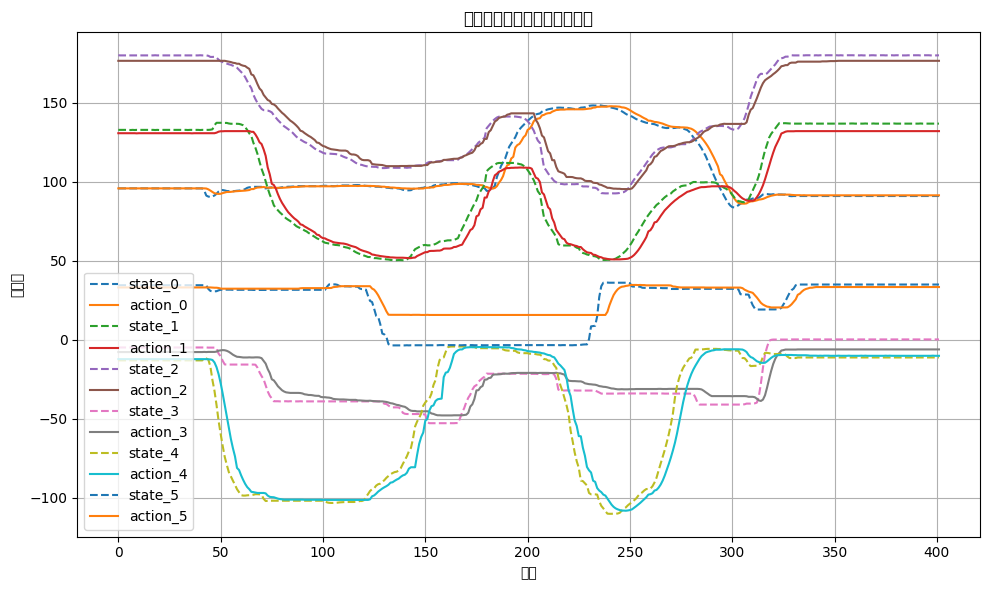

In [48]:
# ‚úÖ Cell 11ÔºöÂèØËßÜÂåñÊ®°ÂûãÂ§çÁé∞ËøáÁ®ãÔºàÂõæÂÉè + ËΩ®ËøπÂØπÊØîÔºâ
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import cv2

# === ËÆæÁΩÆË∑ØÂæÑ ===
clip_dir = Path("recordings/clip_00008")  # ‚úÖ ÊîπÊàê‰Ω†ÊÉ≥ÂõûÊîæÁöÑË∑ØÂæÑ
img_dir0 = clip_dir / "images_cam0"
img_dir1 = clip_dir / "images_cam1"
joint_path = clip_dir / "joint_states" / "state_action.npy"

# === Âä†ËΩΩÂÖ≥ËäÇËΩ®Ëøπ ===
data = np.load(joint_path, allow_pickle=True)
states = data[:, :6]
actions = data[:, 6:]

# === ÊòæÁ§∫ÈÉ®ÂàÜÂõæÂÉèÂ∏ßÔºàÊØèÈöî10Â∏ßÊòæÁ§∫‰∏ÄÂº†Ôºâ ===
print("üñºÔ∏è Ê≠£Âú®Â±ïÁ§∫ÂõæÂÉèÂ∫èÂàóÔºàÊØè 10 Â∏ßÊòæÁ§∫Ôºâ")
for i in range(0, len(states), 10):
    frame0 = cv2.imread(str(img_dir0 / f"frame_{i:05d}.jpg"))
    frame1 = cv2.imread(str(img_dir1 / f"frame_{i:05d}.jpg"))

    if frame0 is not None and frame1 is not None:
        combined = cv2.hconcat([frame0, frame1])
        cv2.imshow("Replay View (Left: Side | Right: Top)", combined)
        if cv2.waitKey(300) & 0xFF == ord("q"):  # Êåâ Q ÊèêÂâçÈÄÄÂá∫
            break
cv2.destroyAllWindows()

# === ÁªòÂà∂ËΩ®ËøπÂØπÊØîÂõæ ===
plt.figure(figsize=(10, 6))
for i in range(6):
    plt.plot(states[:, i], label=f"state_{i}", linestyle="--")
    plt.plot(actions[:, i], label=f"action_{i}")
plt.title("ÂÖ≥ËäÇÁä∂ÊÄÅ‰∏éÈ¢ÑÊµãÂä®‰ΩúËΩ®ËøπÂØπÊØî")
plt.xlabel("Â∏ßÊï∞")
plt.ylabel("ËßíÂ∫¶ÂÄº")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Ë¶ÅÂÆûÁé∞‚Äú‰ªªÊÑè‰ΩçÁΩÆÁâ©‰ΩìÊäìÂèñ‚ÄùÁöÑÂÖ≥ÈîÆÂèòÂåñ
‰Ω†ÂøÖÈ°ªÂä†ÂÖ• ËßÜËßâ‰ø°ÊÅØ‰Ωú‰∏∫Ê®°ÂûãÁöÑËæìÂÖ•ÔºåËøôÊ†∑Ê®°ÂûãÊâçËÉΩÊ†πÊçÆÂõæÂÉèÊé®Êñ≠Áâ©‰Ωì‰ΩçÁΩÆ„ÄÅÂÜçÂÅöÂá∫ÂØπÂ∫îÂä®‰Ωú„ÄÇ
‚úÖ ‰Ω†ÁöÑÁõÆÊ†á
ÂÆûÁé∞‰∏Ä‰∏™‰ΩéÊàêÊú¨Á≥ªÁªüÔºå‰ΩøÂæó LeRobot ËÉΩÔºö

üöÄ Ëá™‰∏ªÂÆåÊàêÔºöÊó†ÈúÄ‰∫∫‰∏∫ÊéßÂà∂

üìç ÊäìÂèñÂ∑•‰ΩúÁ©∫Èó¥ÂÜÖ‰ªªÊÑè‰ΩçÁΩÆÁöÑËØ•Áâ©‰Ωì

üì¶ Áâ©‰ΩìÁßçÁ±ª‰∏çÂèòÔºàÂêå‰∏ÄÊñπÂùóÔºâ

‚úÖ ÊîØÊåÅ 2D Âπ≥Èù¢‰∏äÁöÑ‰ΩçÁΩÆÂèòÂåñÔºàX/Y ÂèòÔºåZ ‰∏çÂèò

### üß† 3. Ê®°Âûã‚ÄúÊ≥õÂåñËÉΩÂäõ‚ÄùÁöÑÊú¨Ë¥®ÊòØ‰ªÄ‰πàÔºü
‰Ω†ËØ¥ÂæóÂØπÔºö

‚ùóËÆ≠ÁªÉÊï∞ÊçÆ‰∏≠Âè™Êúâ 4 ‰∏™Âõ∫ÂÆö‰ΩçÁΩÆ ‚Üí Ê®°Âûã‰πüÂè™ËÉΩÂ≠¶‰ºö‚ÄúÂú®Ëøô4‰∏™Á©∫Èó¥‰ΩçÁΩÆ‚ÄùÂ¶Ç‰ΩïÊäìÂèñ„ÄÇ

Â¶ÇÊûú‰Ω†ÊääÁâ©‰ΩìÊîæÂú®Ôºö

‚úÖ ËÆ≠ÁªÉËøáÁöÑ‰ΩçÁΩÆÈôÑËøë ‚Üí Ê®°ÂûãÂèØËÉΩÊäìÂæóÂáÜÔºàÊØîÂ¶Ç clip_0011 Âíå clip_0012 ‰πãÈó¥ÊèíÂÄºÔºâ

‚ùå Ê≤°ËßÅËøáÁöÑÊñ∞Âå∫ÂüüÔºàÊØîÂ¶Ç clip_0050 ‰ΩçÁΩÆÔºâ ‚Üí ÂÆåÂÖ®‰∏çÁü•ÈÅìÁâ©‰ΩìÂú®Âì™ÂÑøÔºåÂè™ËÉΩÁûéÊäì

üì∑ 4. Ê≤°ÊúâÂõæÁâáÔºåÈÇ£Êú∫Âô®‰∫∫ÊòØ‚ÄúÁûéÂ≠ê‚ÄùÔºÅ
ÊâÄ‰ª•ÔºåÂÖâÈù†ÂÖ≥ËäÇÁä∂ÊÄÅÂÅöËÆ≠ÁªÉÁöÑÊ®°ÂûãÊó†Ê≥ïÂÆö‰ΩçÊñ∞Áâ©‰Ωì‰ΩçÁΩÆÔºåÂõ†‰∏∫Ôºö

ÂÆÉÊ≤°Êúâ ‰ªª‰ΩïËßÜËßâËæìÂÖ•

ÂÆÉÊó†Ê≥ïÂÉè‰∫∫‰∏ÄÊ†∑ËßÇÂØüÁéØÂ¢ÉÔºåÂà§Êñ≠Áâ©‰ΩìÁöÑÊñ∞‰ΩçÁΩÆ

Â∞±ÂÉè‰Ω†ËÆ≠ÁªÉ‰∫Ü‰∏Ä‰∏™Â∞èÂ≠©ÔºöÂëäËØâ‰ªñ‚Äú‰Ω†Âú®Ëøô‰∏™ÂßøÊÄÅÊó∂ÔºåÂæÄÂâç‰º∏ÊâãÂèØ‰ª•ÊäìÂà∞ÊùØÂ≠ê‚ÄùÔºå‰ΩÜÊ≤°ÊúâÊïô‰ªñÂ¶Ç‰Ωï‚ÄúÊâæÂà∞ÊùØÂ≠ê‚ÄùÔºå‰ªñÂ∞±Âè™ËÉΩÂú®ËÆ∞ÂøÜ‰∏≠ÊâæÊäìÊ≥ïÔºåËÄå‰∏çÊòØÊÑüÁü•Áé∞ÂÆû„ÄÇ

### 
1. ‰ªÖ‰ΩøÁî®ÂÖ≥ËäÇÊï∞ÊçÆËÆ≠ÁªÉ ACT Ê®°Âûã
Êï∞ÊçÆÂÜÖÂÆπÔºö‰Ω†ÂΩìÂâç40ÁªÑÊï∞ÊçÆ‰∏≠ÔºåÊØè‰∏™ clip ÂåÖÂê´‰∫ÜÊú∫Âô®‰∫∫ÊäìÂèñÊó∂ÁöÑÂÖ≥ËäÇÁä∂ÊÄÅ‰∏éÂä®‰ΩúÔºàstate-action Êï∞ÊçÆÔºâ„ÄÇ

ËÆ≠ÁªÉÊïàÊûúÔºö

Ê®°Âûã‰ºöÂ≠¶‰π†Â¶Ç‰Ωï‰ªéËøáÂéªÁöÑÁä∂ÊÄÅÂ∫èÂàóÈ¢ÑÊµã‰∏ã‰∏ÄÊ≠•Âä®‰Ωú„ÄÇ

Â¶ÇÊûú‰Ω†Âè™ËÆ≠ÁªÉÂÖ≥ËäÇÊï∞ÊçÆÔºåÈÇ£‰πàÊ®°Âûã‚ÄúËÆ∞‰Ωè‚ÄùÁöÑÂ∞±ÊòØÈÇ£‰∫õËÆ≠ÁªÉËøáÁöÑ‰ΩçÁΩÆÂíåËΩ®ËøπÔºåËÉΩÂ§üÂú®ÈÇ£‰∫õ‰ΩçÁΩÆ‰∏äËæÉÂ•ΩÂú∞Â§çÁé∞ÊäìÂèñÂä®‰Ωú„ÄÇ

Â±ÄÈôêÊÄßÔºö

Ê®°Âûã‰∏ç‰ºö‚ÄúÁü•ÈÅì‚ÄùÁâ©‰ΩìÂú®Âì™ÈáåÔºåÂõ†‰∏∫ÂÖ≥ËäÇÊï∞ÊçÆÂè™ÂèçÊò†‰∫ÜÊú∫Âô®‰∫∫Âú®ÊâßË°åÈ¢ÑËÆæÂä®‰ΩúÊó∂ÁöÑÂßøÊÄÅÔºåËÄå‰∏çÂåÖÂê´ÁéØÂ¢É‰ø°ÊÅØ„ÄÇ

Â¶ÇÊûú‰Ω†ÊääÁâ©‰ΩìÊîæÂú®‰∏Ä‰∏™Êú™ÈááÈõÜËøáÁöÑ‰ΩçÁΩÆÔºåÊ®°ÂûãÊó†Ê≥ïÊÑüÁü•Áâ©‰ΩìÁöÑÊñ∞‰ΩçÁΩÆÔºåÂè™ËÉΩÂ§çÁé∞ËÆ≠ÁªÉËøáÁöÑÊäìÂèñËΩ®ËøπÔºåÂØºËá¥ÊäìÂèñÂ§±Ë¥•ÊàñÂÅèÂ∑Æ„ÄÇ

2. ‰ΩøÁî®ËßÜËßâÊï∞ÊçÆ+ÂÖ≥ËäÇÊï∞ÊçÆËÆ≠ÁªÉËßÜËßâÊ®°‰ªøÊ®°Âûã
Êï∞ÊçÆÂÜÖÂÆπÔºöÂú®‰Ω†ÂΩìÂâçÈááÈõÜÁöÑÊØè‰∏™ clip ‰∏≠ÔºåÈô§‰∫ÜÂÖ≥ËäÇÁä∂ÊÄÅ‰πãÂ§ñÔºåËøòÈááÈõÜ‰∫Ü‰∏§Ë∑ØÂõæÂÉèÔºà‰æßËßÜÂíå‰øØËßÜÔºâ„ÄÇ

ËÆ≠ÁªÉÊïàÊûúÔºö

Â¶ÇÊûú‰Ω†Â∞ÜÂõæÂÉèÊï∞ÊçÆ‰∏éÂÖ≥ËäÇÊï∞ÊçÆËÅîÂêàËµ∑Êù•ËÆ≠ÁªÉÊ®°ÂûãÔºåÈÇ£‰πàÊ®°ÂûãÂèØ‰ª•Â≠¶‰π†Âà∞Â¶Ç‰ΩïÊ†πÊçÆËßÜËßâ‰ø°ÊÅØÂà§Êñ≠Áâ©‰ΩìÁöÑ‰ΩçÁΩÆÔºåÂÜçÁªìÂêàÂÖ≥ËäÇÁä∂ÊÄÅÁªôÂá∫ÂêàÈÄÇÁöÑÊäìÂèñÂä®‰Ωú„ÄÇ

ËøôÁßçÊñπÂºèËÉΩÂ§üËÆ©Êú∫Âô®‰∫∫Âú®Áâ©‰ΩìÂá∫Áé∞Âú®Êú™ËÆ≠ÁªÉ‰ΩçÁΩÆÊó∂ÔºåÊ†πÊçÆËßÜËßâÂèçÈ¶àËøõË°åÁõ∏Â∫îÁöÑË∞ÉÊï¥ÔºåÂÆûÁé∞Êõ¥Âº∫ÁöÑÊ≥õÂåñËÉΩÂäõ„ÄÇ

ÂÆûÁé∞ÊåëÊàòÔºö

ÈúÄË¶ÅËÆæËÆ°‰∏Ä‰∏™Â§öÊ®°ÊÄÅÁΩëÁªúÁªìÊûÑÔºà‰æãÂ¶ÇÂÖàÁî® CNN/ViT ÊèêÂèñÂõæÂÉèÁâπÂæÅÔºåÂÜç‰∏éÂÖ≥ËäÇÁä∂ÊÄÅËûçÂêàÔºåËæìÂÖ•Âà∞ Transformer Ê®°Âûã‰∏≠Ôºâ„ÄÇ

Êï∞ÊçÆÈ¢ÑÂ§ÑÁêÜÂíåÂØπÈΩêË¶ÅÊ±ÇÊõ¥È´òÔºåËÆ≠ÁªÉÊó∂Èó¥ÂíåÁÆóÂäõÊ∂àËÄó‰πü‰ºöÂ¢ûÂä†„ÄÇ

### Èò∂ÊÆµÂÖ≠ÔºöÈùûÂ∏∏Â•ΩÔºÅÁé∞Âú®‰Ω†Â∑≤ÁªèÂÆåÊàê‰∫ÜÂÖ≥ÈîÆÁöÑÈùôÊÄÅÊäìÂèñÊï∞ÊçÆÈááÈõÜÔºåÊé•‰∏ãÊù•Êàë‰ª¨ÂèØ‰ª• ‰∏ÄÊ≠•Ê≠•ÂºÄÂßãËÆ≠ÁªÉËßÜËßâÂºïÂØºÁöÑ ACT Á≠ñÁï•Ê®°ÂûãÔºå‰ª•‰æøËÆ© LeRobot ÂÆûÁé∞‚ÄúËá™‰∏ªÊäìÂèñ‰ªªÊÑè‰ΩçÁΩÆÁâ©‰Ωì‚ÄùÁöÑËÉΩÂäõ„ÄÇ

‚úÖ Èò∂ÊÆµÁõÆÊ†áÔºö
‰ΩøÁî®‰Ω†ÈááÈõÜÁöÑ 40 ÁªÑÂ§ö‰ΩçÁΩÆÊäìÂèñÊï∞ÊçÆÔºåËÆ≠ÁªÉ‰∏Ä‰∏™ËûçÂêàÂõæÂÉè + ÂÖ≥ËäÇ‰ø°ÊÅØÁöÑ Transformer Ê®°ÂûãÔºàACTPolicyÔºâÔºåÂÆåÊàêËßÜËßâÂºïÂØºÁöÑÊ®°‰ªøÂ≠¶‰π†„ÄÇ

In [66]:
from pathlib import Path

recording_dir = Path("/home/wjw/lerobot/results/recordings")
clips = sorted(recording_dir.glob("clip_*"))
print(f"ÊâæÂà∞ {len(clips)} ‰∏™ clip Êñá‰ª∂Â§π")

ÊâæÂà∞ 40 ‰∏™ clip Êñá‰ª∂Â§π


In [64]:
import os
import shutil
import json
from pathlib import Path
from tqdm import tqdm


def convert_clip_to_lerobot_dataset(recording_dir, output_dir):
    """
    Â∞ÜÈááÈõÜÁöÑ clip Êñá‰ª∂Â§πËΩ¨Êç¢‰∏∫ LeRobotDataset ÊâÄÈúÄÁöÑÁªìÊûÑ„ÄÇ
    ËæìÂÖ•ÊòØ‰∏Ä‰∏™ recordings Êñá‰ª∂Â§πÔºåËæìÂá∫ÊòØÊ†áÂáÜÁªìÊûÑÁöÑÊï∞ÊçÆÈõÜ„ÄÇ
    """
    recording_dir = Path(recording_dir)
    output_dir = Path(output_dir)
    output_dir.mkdir(parents=True, exist_ok=True)

    for clip_dir in tqdm(sorted(recording_dir.glob("clip_*"))):
        clip_name = clip_dir.name
        new_clip_path = output_dir / clip_name / "observation"
        (new_clip_path / "images" / "cam0").mkdir(parents=True, exist_ok=True)
        (new_clip_path / "images" / "cam1").mkdir(parents=True, exist_ok=True)

        # Â§çÂà∂ÂõæÂÉè
        for cam_id in ["cam0", "cam1"]:
            img_dir = clip_dir / f"images_{cam_id}"
            if img_dir.exists():
                for img_file in sorted(img_dir.glob("*.jpg")):
                    shutil.copy(img_file, new_clip_path / "images" / cam_id / img_file.name)

        # Â§çÂà∂ joint_states ‰∏≠ÁöÑ .npy Êñá‰ª∂
        joint_dir = clip_dir / "joint_states"
        shutil.copy(joint_dir / "state_action.npy", output_dir / clip_name / "action.npy")
        shutil.copy(joint_dir / "state_action.npy", output_dir / clip_name / "state.npy")  # Âêå‰∏Ä‰∏™Áî®‰∫éËæìÂÖ•ËæìÂá∫

        # ÂàõÂª∫ meta.yamlÔºàÊúÄÁÆÄÊ†ºÂºèÔºâ
        with open(output_dir / clip_name / "meta.yaml", "w") as f:
            json.dump({
                "fps": 30,
                "camera_names": ["cam0", "cam1"],
                "state_dim": 6,
                "action_dim": 6
            }, f)

    print("‚úÖ ÊâÄÊúâ clip Êï∞ÊçÆÂ∑≤ËΩ¨Êç¢‰∏∫ LeRobotDataset Ê†ºÂºèÔºÅ")


In [65]:
convert_clip_to_lerobot_dataset(
    recording_dir="/home/wjw/lerobot/results/recordings",
    output_dir="/home/wjw/lerobot/results/lerobot_dataset"
)



100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 40/40 [00:02<00:00, 18.54it/s]

‚úÖ ÊâÄÊúâ clip Êï∞ÊçÆÂ∑≤ËΩ¨Êç¢‰∏∫ LeRobotDataset Ê†ºÂºèÔºÅ


In [71]:
! tree /home/wjw/lerobot/results/lerobot_dataset/clip_00001




/home/wjw/lerobot/results/lerobot_dataset/clip_00001
‚îú‚îÄ‚îÄ action.npy
‚îú‚îÄ‚îÄ meta.yaml
‚îú‚îÄ‚îÄ observation
‚îÇ¬†¬† ‚îî‚îÄ‚îÄ images
‚îÇ¬†¬†     ‚îú‚îÄ‚îÄ cam0
‚îÇ¬†¬†     ‚îÇ¬†¬† ‚îú‚îÄ‚îÄ frame_00000.jpg
‚îÇ¬†¬†     ‚îÇ¬†¬† ‚îú‚îÄ‚îÄ frame_00001.jpg
‚îÇ¬†¬†     ‚îÇ¬†¬† ‚îú‚îÄ‚îÄ frame_00002.jpg
‚îÇ¬†¬†     ‚îÇ¬†¬† ‚îú‚îÄ‚îÄ frame_00003.jpg
‚îÇ¬†¬†     ‚îÇ¬†¬† ‚îú‚îÄ‚îÄ frame_00004.jpg
‚îÇ¬†¬†     ‚îÇ¬†¬† ‚îú‚îÄ‚îÄ frame_00005.jpg
‚îÇ¬†¬†     ‚îÇ¬†¬† ‚îú‚îÄ‚îÄ frame_00006.jpg
‚îÇ¬†¬†     ‚îÇ¬†¬† ‚îú‚îÄ‚îÄ frame_00007.jpg
‚îÇ¬†¬†     ‚îÇ¬†¬† ‚îú‚îÄ‚îÄ frame_00008.jpg
‚îÇ¬†¬†     ‚îÇ¬†¬† ‚îú‚îÄ‚îÄ frame_00009.jpg
‚îÇ¬†¬†     ‚îÇ¬†¬† ‚îú‚îÄ‚îÄ frame_00010.jpg
‚îÇ¬†¬†     ‚îÇ¬†¬† ‚îú‚îÄ‚îÄ frame_00011.jpg
‚îÇ¬†¬†     ‚îÇ¬†¬† ‚îú‚îÄ‚îÄ frame_00012.jpg
‚îÇ¬†¬†     ‚îÇ¬†¬† ‚îú‚îÄ‚îÄ frame_00013.jpg
‚îÇ¬†¬†     ‚îÇ¬†¬† ‚îú‚îÄ‚îÄ frame_00014.jpg
‚îÇ¬†¬†     ‚îÇ¬†¬† ‚îú‚îÄ‚îÄ frame_00015.jpg
‚îÇ¬†¬†     ‚îÇ¬†¬† ‚îú‚îÄ‚îÄ frame_00016.jpg
‚îÇ¬†¬†     ‚îÇ¬†¬† ‚îú‚îÄ‚îÄ frame_00017.jpg
‚îÇ¬

In [70]:
!nvidia-smi


Tue Apr  1 01:51:44 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.120                Driver Version: 550.120        CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4060 ...    Off |   00000000:01:00.0  On |                  N/A |
| N/A   52C    P4              9W /   80W |     540MiB /   8188MiB |      6%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [72]:
import torch

if torch.cuda.is_available():
    print("‚úÖ ÂΩìÂâçÁ≥ªÁªüÊîØÊåÅ CUDAÔºÅÂ∞Ü‰ΩøÁî® GPU ËøõË°åËÆ≠ÁªÉ„ÄÇ")
    print("üñ•Ô∏è ÂΩìÂâç‰ΩøÁî®ÁöÑ GPU:", torch.cuda.get_device_name(0))
else:
    print("‚ö†Ô∏è ÂΩìÂâçÁ≥ªÁªü‰∏çÊîØÊåÅ CUDAÔºå‰ªÖËÉΩ‰ΩøÁî® CPU ËÆ≠ÁªÉ„ÄÇ")
    print("üß† ËÆ≠ÁªÉÈÄüÂ∫¶ÂèØËÉΩËæÉÊÖ¢ÔºåÂª∫ËÆÆÊ£ÄÊü• GPU È©±Âä®ÊàñÂÆâË£Ö CUDA ÊîØÊåÅÁâàÊú¨„ÄÇ")



‚úÖ ÂΩìÂâçÁ≥ªÁªüÊîØÊåÅ CUDAÔºÅÂ∞Ü‰ΩøÁî® GPU ËøõË°åËÆ≠ÁªÉ„ÄÇ
üñ•Ô∏è ÂΩìÂâç‰ΩøÁî®ÁöÑ GPU: NVIDIA GeForce RTX 4060 Laptop GPU


In [74]:
import os

# ÂàáÊç¢Âà∞ lerobot È°πÁõÆÊ†πÁõÆÂΩï
os.chdir("/home/wjw/lerobot")

# ÊâìÂç∞ÂΩìÂâçË∑ØÂæÑÁ°ÆËÆ§
print("üìÇ ÂΩìÂâçË∑ØÂæÑÔºö", os.getcwd())


üìÇ ÂΩìÂâçË∑ØÂæÑÔºö /home/wjw/lerobot


In [75]:
# ‚úÖ Cell 1ÔºöËÆæÁΩÆËÆ≠ÁªÉÂèÇÊï∞‰∏éÂü∫Êú¨‰ø°ÊÅØ
import os
from pathlib import Path

# È°πÁõÆÊ†πË∑ØÂæÑ
project_root = Path("/home/wjw/lerobot")
results_root = project_root / "results"
recordings_dir = results_root / "recordings"
dataset_dir = results_root / "lerobot_dataset"

# ÈÖçÁΩÆÂèÇÊï∞
policy_name = "act_koch_real"
env_name = "koch_real"
dataset_repo_id = "wjw_user/koch_static_v1"
ckpt_dir = project_root / "outputs" / "train" / "act_koch_test"
ckpt_dir.mkdir(parents=True, exist_ok=True)

# ËÆæÂ§áËÆæÁΩÆÔºàÂª∫ËÆÆ‰ΩøÁî® GPUÔºâ
device = "cuda"  # Â¶ÇÊûúÊ≤°Êúâ GPUÔºåÂèØÊîπ‰∏∫ "cpu"
print("‚úÖ ÈÖçÁΩÆÂÆåÊàêÔºåÂáÜÂ§áÂºÄÂßãËÆ≠ÁªÉ")
print("üìÅ Êï∞ÊçÆË∑ØÂæÑ:", dataset_dir)
print("üìÅ ËæìÂá∫Ë∑ØÂæÑ:", ckpt_dir)



‚úÖ ÈÖçÁΩÆÂÆåÊàêÔºåÂáÜÂ§áÂºÄÂßãËÆ≠ÁªÉ
üìÅ Êï∞ÊçÆË∑ØÂæÑ: /home/wjw/lerobot/results/lerobot_dataset
üìÅ ËæìÂá∫Ë∑ØÂæÑ: /home/wjw/lerobot/outputs/train/act_koch_test


In [82]:
# ‚úÖ ‰øÆÂ§çÂêé Cell 2ÔºöÂà†Èô§‰∏çÊîØÊåÅÁöÑ --device ÂèÇÊï∞
import subprocess

command = [
    "python", "lerobot/scripts/train.py",
    "--dataset.repo_id", "wjw_user/koch_static_v1",
    "--policy", "act_koch_real",
    "--env", "koch_real",
    "--wandb.enable", "false",
    "--output_dir", "outputs/train/act_koch_test",
    "--job_name", "act_koch_test"
]

print("üöÄ ÂºÄÂßãËÆ≠ÁªÉÔºåËØ∑ËÄêÂøÉÁ≠âÂæÖ...ÔºàÈ¢ÑËÆ°Âá†ÂàÜÈíüËá≥ÂçÅÂá†ÂàÜÈíüÔºâ")
print("üìü ÂëΩ‰ª§Ôºö", " ".join(command))

process = subprocess.Popen(command, stdout=subprocess.PIPE, stderr=subprocess.STDOUT, text=True)
for line in process.stdout:
    print(line, end="")
process.wait()

print("\n‚úÖ ËÆ≠ÁªÉÁªìÊùüÔºåÊ®°Âûã‰øùÂ≠òÂú®Ôºöoutputs/train/act_koch_test/checkpoints/last/pretrained_model")


üöÄ ÂºÄÂßãËÆ≠ÁªÉÔºåËØ∑ËÄêÂøÉÁ≠âÂæÖ...ÔºàÈ¢ÑËÆ°Âá†ÂàÜÈíüËá≥ÂçÅÂá†ÂàÜÈíüÔºâ
üìü ÂëΩ‰ª§Ôºö python lerobot/scripts/train.py --dataset.repo_id wjw_user/koch_static_v1 --policy act_koch_real --env koch_real --wandb.enable false --output_dir outputs/train/act_koch_test --job_name act_koch_test
Traceback (most recent call last):
  File "/home/wjw/miniconda3/envs/lerobot/lib/python3.10/site-packages/draccus/parsers/decoding.py", line 357, in _try_functions
    return func(val, path)
  File "/home/wjw/miniconda3/envs/lerobot/lib/python3.10/site-packages/draccus/parsers/decoding.py", line 180, in decode_choice_class
    raise ParsingError(f"Expected a dict for a choice class, got {raw_value}")
draccus.utils.ParsingError: Expected a dict for a choice class, got koch_real

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/home/wjw/lerobot/lerobot/scripts/train.py", line 288, in <module>
    train()
  File "/home/wjw/lerobot/lerobot/c

In [83]:
import subprocess

command = [
    "python", "lerobot/scripts/train.py",
    "--config_path", "lerobot/configs/policy/act_koch_real.yaml",
    "--dataset.repo_id", "wjw_user/koch_static_v1",
    "--output_dir", "outputs/train/act_koch_test",
    "--job_name", "act_koch_test",
    "--wandb.enable", "false"
]

print("üöÄ Ê≠£Âú®ËÆ≠ÁªÉËßÜËßâÂºïÂØº ACT Ê®°ÂûãÔºåËØ∑Á®çÁ≠â...")
process = subprocess.Popen(command, stdout=subprocess.PIPE, stderr=subprocess.STDOUT, text=True)
for line in process.stdout:
    print(line, end="")
process.wait()


üöÄ Ê≠£Âú®ËÆ≠ÁªÉËßÜËßâÂºïÂØº ACT Ê®°ÂûãÔºåËØ∑Á®çÁ≠â...
Traceback (most recent call last):
  File "/home/wjw/lerobot/lerobot/scripts/train.py", line 288, in <module>
    train()
  File "/home/wjw/lerobot/lerobot/configs/parser.py", line 226, in wrapper_inner
    cfg = draccus.parse(config_class=argtype, config_path=config_path, args=cli_args)
  File "/home/wjw/miniconda3/envs/lerobot/lib/python3.10/site-packages/draccus/argparsing.py", line 211, in parse
    return parser.parse_args(args)
  File "/home/wjw/miniconda3/envs/lerobot/lib/python3.10/site-packages/draccus/argparsing.py", line 102, in parse_args
    args, _ = self.parse_known_args(args, namespace, is_parse_args=True)
  File "/home/wjw/miniconda3/envs/lerobot/lib/python3.10/site-packages/draccus/argparsing.py", line 136, in parse_known_args
    parsed_t = self._postprocessing(parsed_args)
  File "/home/wjw/miniconda3/envs/lerobot/lib/python3.10/site-packages/draccus/argparsing.py", line 180, in _postprocessing
    cfg = decodi

1

In [84]:
# ‚úÖ CellÔºöÊ≠£ÂºèËÆ≠ÁªÉÂëΩ‰ª§
import subprocess

command = [
    "python", "lerobot/scripts/train.py",
    "--config-path", "lerobot/configs/train",
    "--config-name", "vision_act_koch.yaml"
]

print("üöÄ Ê≠£Âú®ËÆ≠ÁªÉËßÜËßâÂºïÂØº ACT Ê®°ÂûãÔºåËØ∑Á®çÁ≠â...\n")
print("üìü ÂëΩ‰ª§Ôºö", " ".join(command))

process = subprocess.Popen(command, stdout=subprocess.PIPE, stderr=subprocess.STDOUT, text=True)
for line in process.stdout:
    print(line, end="")
process.wait()

print("\n‚úÖ ËÆ≠ÁªÉÁªìÊùüÔºÅËØ∑Ê£ÄÊü•ËæìÂá∫Ê®°ÂûãÊòØÂê¶‰øùÂ≠òÂú®Ôºöoutputs/train/act_koch_test/checkpoints/last/pretrained_model")


üöÄ Ê≠£Âú®ËÆ≠ÁªÉËßÜËßâÂºïÂØº ACT Ê®°ÂûãÔºåËØ∑Á®çÁ≠â...

üìü ÂëΩ‰ª§Ôºö python lerobot/scripts/train.py --config-path lerobot/configs/train --config-name vision_act_koch.yaml
usage: train.py [-h] [--config_path str] [--dataset str]
                [--dataset.repo_id str] [--dataset.root str]
                [--dataset.episodes str] [--image_transforms str]
                [--dataset.image_transforms.enable str]
                [--dataset.image_transforms.max_num_transforms str]
                [--dataset.image_transforms.random_order str]
                [--dataset.image_transforms.tfs str] [--dataset.revision str]
                [--dataset.use_imagenet_stats str]
                [--dataset.video_backend str] [--env str]
                [--env.type {aloha,pusht,xarm}] [--env.task str]
                [--env.fps str] [--env.features str] [--env.features_map str]
                [--env.episode_length str] [--env.obs_type str]
                [--env.render_mode str] [--env.visualization_

### Èò∂ÊÆµ‰∫îÔºöÁªìÊùüÔºåÊñ≠ÂºÄËøûÊé•

In [11]:
from lerobot.common.robot_devices.motors.dynamixel import TorqueMode

# ÂÖ≥Èó≠‰∏ªËáÇÁöÑÊâÄÊúâÂÖ≥ËäÇÊâ≠Áü©
robot.leader_arms["main"].write("Torque_Enable", TorqueMode.DISABLED.value)

# ÂÖ≥Èó≠‰ªéËáÇÁöÑÊâÄÊúâÂÖ≥ËäÇÊâ≠Áü©
robot.follower_arms["main"].write("Torque_Enable", TorqueMode.DISABLED.value)

print("‚úÖ  ‰∏ªËáÇÂíå‰ªéËáÇÊâ≠Áü©Â∑≤ÂÖ≥Èó≠ÔºÅ")

leader_torque = robot.leader_arms["main"].read("Torque_Enable")
follower_torque = robot.follower_arms["main"].read("Torque_Enable")

print("üîç  ‰∏ªËáÇÊâ≠Áü©Áä∂ÊÄÅ:", leader_torque)
print("üîç  ‰ªéËáÇÊâ≠Áü©Áä∂ÊÄÅ:", follower_torque)

assert all(t == 0 for t in leader_torque), "‚ùå  ‰∏ªËáÇÊâ≠Áü©Êú™Ê≠£Á°ÆÂÖ≥Èó≠ÔºÅ"
assert all(t == 0 for t in follower_torque), "‚ùå  ‰ªéËáÇÊâ≠Áü©Êú™Ê≠£Á°ÆÂÖ≥Èó≠ÔºÅ"

print("‚úÖ  ‰∏ª‰ªéËáÇÊâ≠Áü©Â∑≤Á°ÆËÆ§ÂÖ≥Èó≠ÔºÅ")


ConnectionError: Write failed due to communication error on port /dev/serial/by-id/usb-1a86_USB_Single_Serial_58FA096602-if00 for group_key Torque_Enable_shoulder_pan_shoulder_lift_elbow_flex_wrist_flex_wrist_roll_gripper: [TxRxResult] Port is in use!

In [12]:
robot.disconnect()
print("‚úÖ  Êú∫Ê¢∞ËáÇÂ∑≤Êñ≠ÂºÄËøûÊé•")

‚úÖ  Êú∫Ê¢∞ËáÇÂ∑≤Êñ≠ÂºÄËøûÊé•
